# Analyse exploratoire des Segments

Ce Notebook contient une analyse exploratoire des données après la phase de Segmentation (`segmented_data`).

Nous allons examiner les caractéristiques principales des données, visualiser les répartitions et identifier les tendances pertinentes.

In [1]:
# Importer les bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Charger les données segmentées
segmented_data_path = "../data/processed/segmented_data.csv"
segmented_data = pd.read_csv(segmented_data_path)

# Aperçu des données
segmented_data.head()

,DATE_OF_THE_DAY,SIM_NUMBER,HAS_USED_MOB_MONEY_IN_LAST_30_DAYS,HAS_USED_MOB_MONEY_IN_LAST_7_DAYS,HAS_USED_MOB_MONEY_IN_LAST_90_DAYS,PAID_DATA_VOLUME,PAID_VOICE_TRAFFIC,HAS_USED_MOB_MONEY_IN_LAST_1_DAY,VOICE_REVENUE,DATA_REVENUE,...,age,tenure_years,Mobile_Money_Score,Data_Service_Score,Voice_Service_Score,SMS_Service_Score,Digital_Service_Score,Profile_Code,Weighted_Score,Segment
0,20230918,C1850294050,1,1,1,1551.85,1311.07,1,486.81,115.21,...,59,2,2,2,3,4,4,22344,39,Very Low
1,20231029,C2042071881,0,1,1,4759.05,267.29,1,77.07,110.88,...,57,2,3,4,3,4,1,34341,49,High
2,20231102,C1001545517,0,1,1,4813.52,24.33,0,83.86,7.84,...,59,2,4,3,3,3,2,43332,49,High
3,20231126,C1204243390,0,1,1,734.09,1018.34,0,284.10,18.31,...,52,2,3,2,3,3,3,32333,41,Very Low
4,20230801,C913434705,1,1,1,2166.61,255.10,1,464.50,120.56,...,46,2,3,3,3,3,3,33333,45,Medium


In [3]:
# Afficher les informations générales
segmented_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351748 entries, 0 to 351747
Columns: 111 entries, DATE_OF_THE_DAY to Segment
dtypes: float64(33), int64(56), object(22)
memory usage: 297.9+ MB


In [4]:
# Taille des segments
segment_counts = segmented_data['Segment'].value_counts(normalize=True)
segment_counts

Segment
High         0.257264
Very High    0.213829
Medium       0.195643
Low          0.177269
Very Low     0.155995
Name: proportion, dtype: float64

/tmp/ipykernel_15721/2944908939.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.index, y=segment_counts.values, palette="viridis")


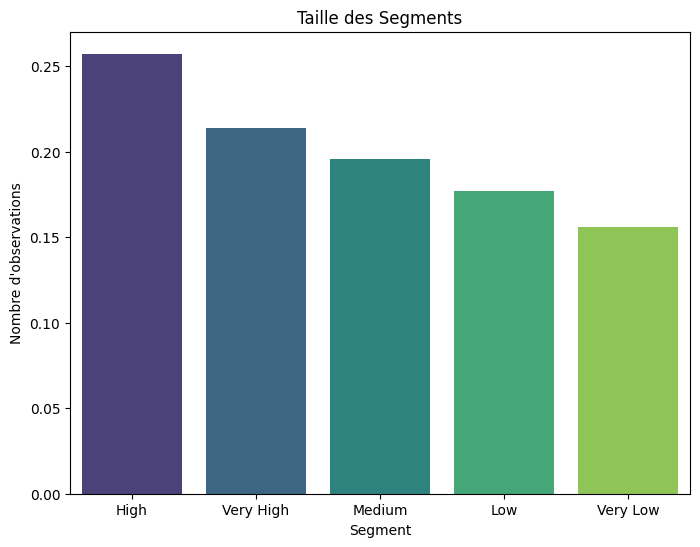

In [5]:
# Visualisation : Taille des segments
plt.figure(figsize=(8, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette="viridis")
plt.title("Taille des Segments")
plt.xlabel("Segment")
plt.ylabel("Nombre d'observations")
plt.show()

In [6]:
segmented_data.Mobile_Money_Score.value_counts(normalize=True)*100

Mobile_Money_Score
3    75.231131
4    19.217167
2     5.532085
5     0.018763
1     0.000853
Name: proportion, dtype: float64

In [8]:
# Define transaction and subscription columns
transaction_columns = [
    'MOB_MONEY_REVENUE', 'TOTAL_SPENT_MOB_MONEY_ACCOUNT', 'TOTAL_LOADING_MONEY_IN_MOB_MONEY',
    'TOTAL_CASHOUT_MOB_MONEY_ACCOUNT', 'TOTAL_CASHOUT_MOB_MONEY_FOR_package_PURCHASE',
    'TOTAL_CASHOUT_MOB_MONEY_TRANSFER_MONEY', 'REFILL_mobile_money_ACCOUNT'
]

# Calculate the average of each transaction column for each unique Mobile_Money_Score
average_transaction_scores = segmented_data.groupby('Mobile_Money_Score')[transaction_columns].mean().reset_index()

# Display the resulting dataframe
average_transaction_scores

,Mobile_Money_Score,MOB_MONEY_REVENUE,TOTAL_SPENT_MOB_MONEY_ACCOUNT,TOTAL_LOADING_MONEY_IN_MOB_MONEY,TOTAL_CASHOUT_MOB_MONEY_ACCOUNT,TOTAL_CASHOUT_MOB_MONEY_FOR_package_PURCHASE,TOTAL_CASHOUT_MOB_MONEY_TRANSFER_MONEY,REFILL_mobile_money_ACCOUNT
0,1,208.096667,616.783333,202.733333,1316.426667,151.443333,130.610000,121.410000
1,2,319.611846,1595.935856,1598.915435,1604.346542,638.711263,961.619161,318.485967
2,3,480.864028,2401.990413,2405.035509,2400.059189,960.368693,1440.124709,480.612550
3,4,629.448393,3142.763458,3142.798267,3141.906524,1254.868627,1879.957182,628.671741
4,5,824.243485,4029.746667,4068.018182,3925.670606,1677.122879,2405.481061,817.135455


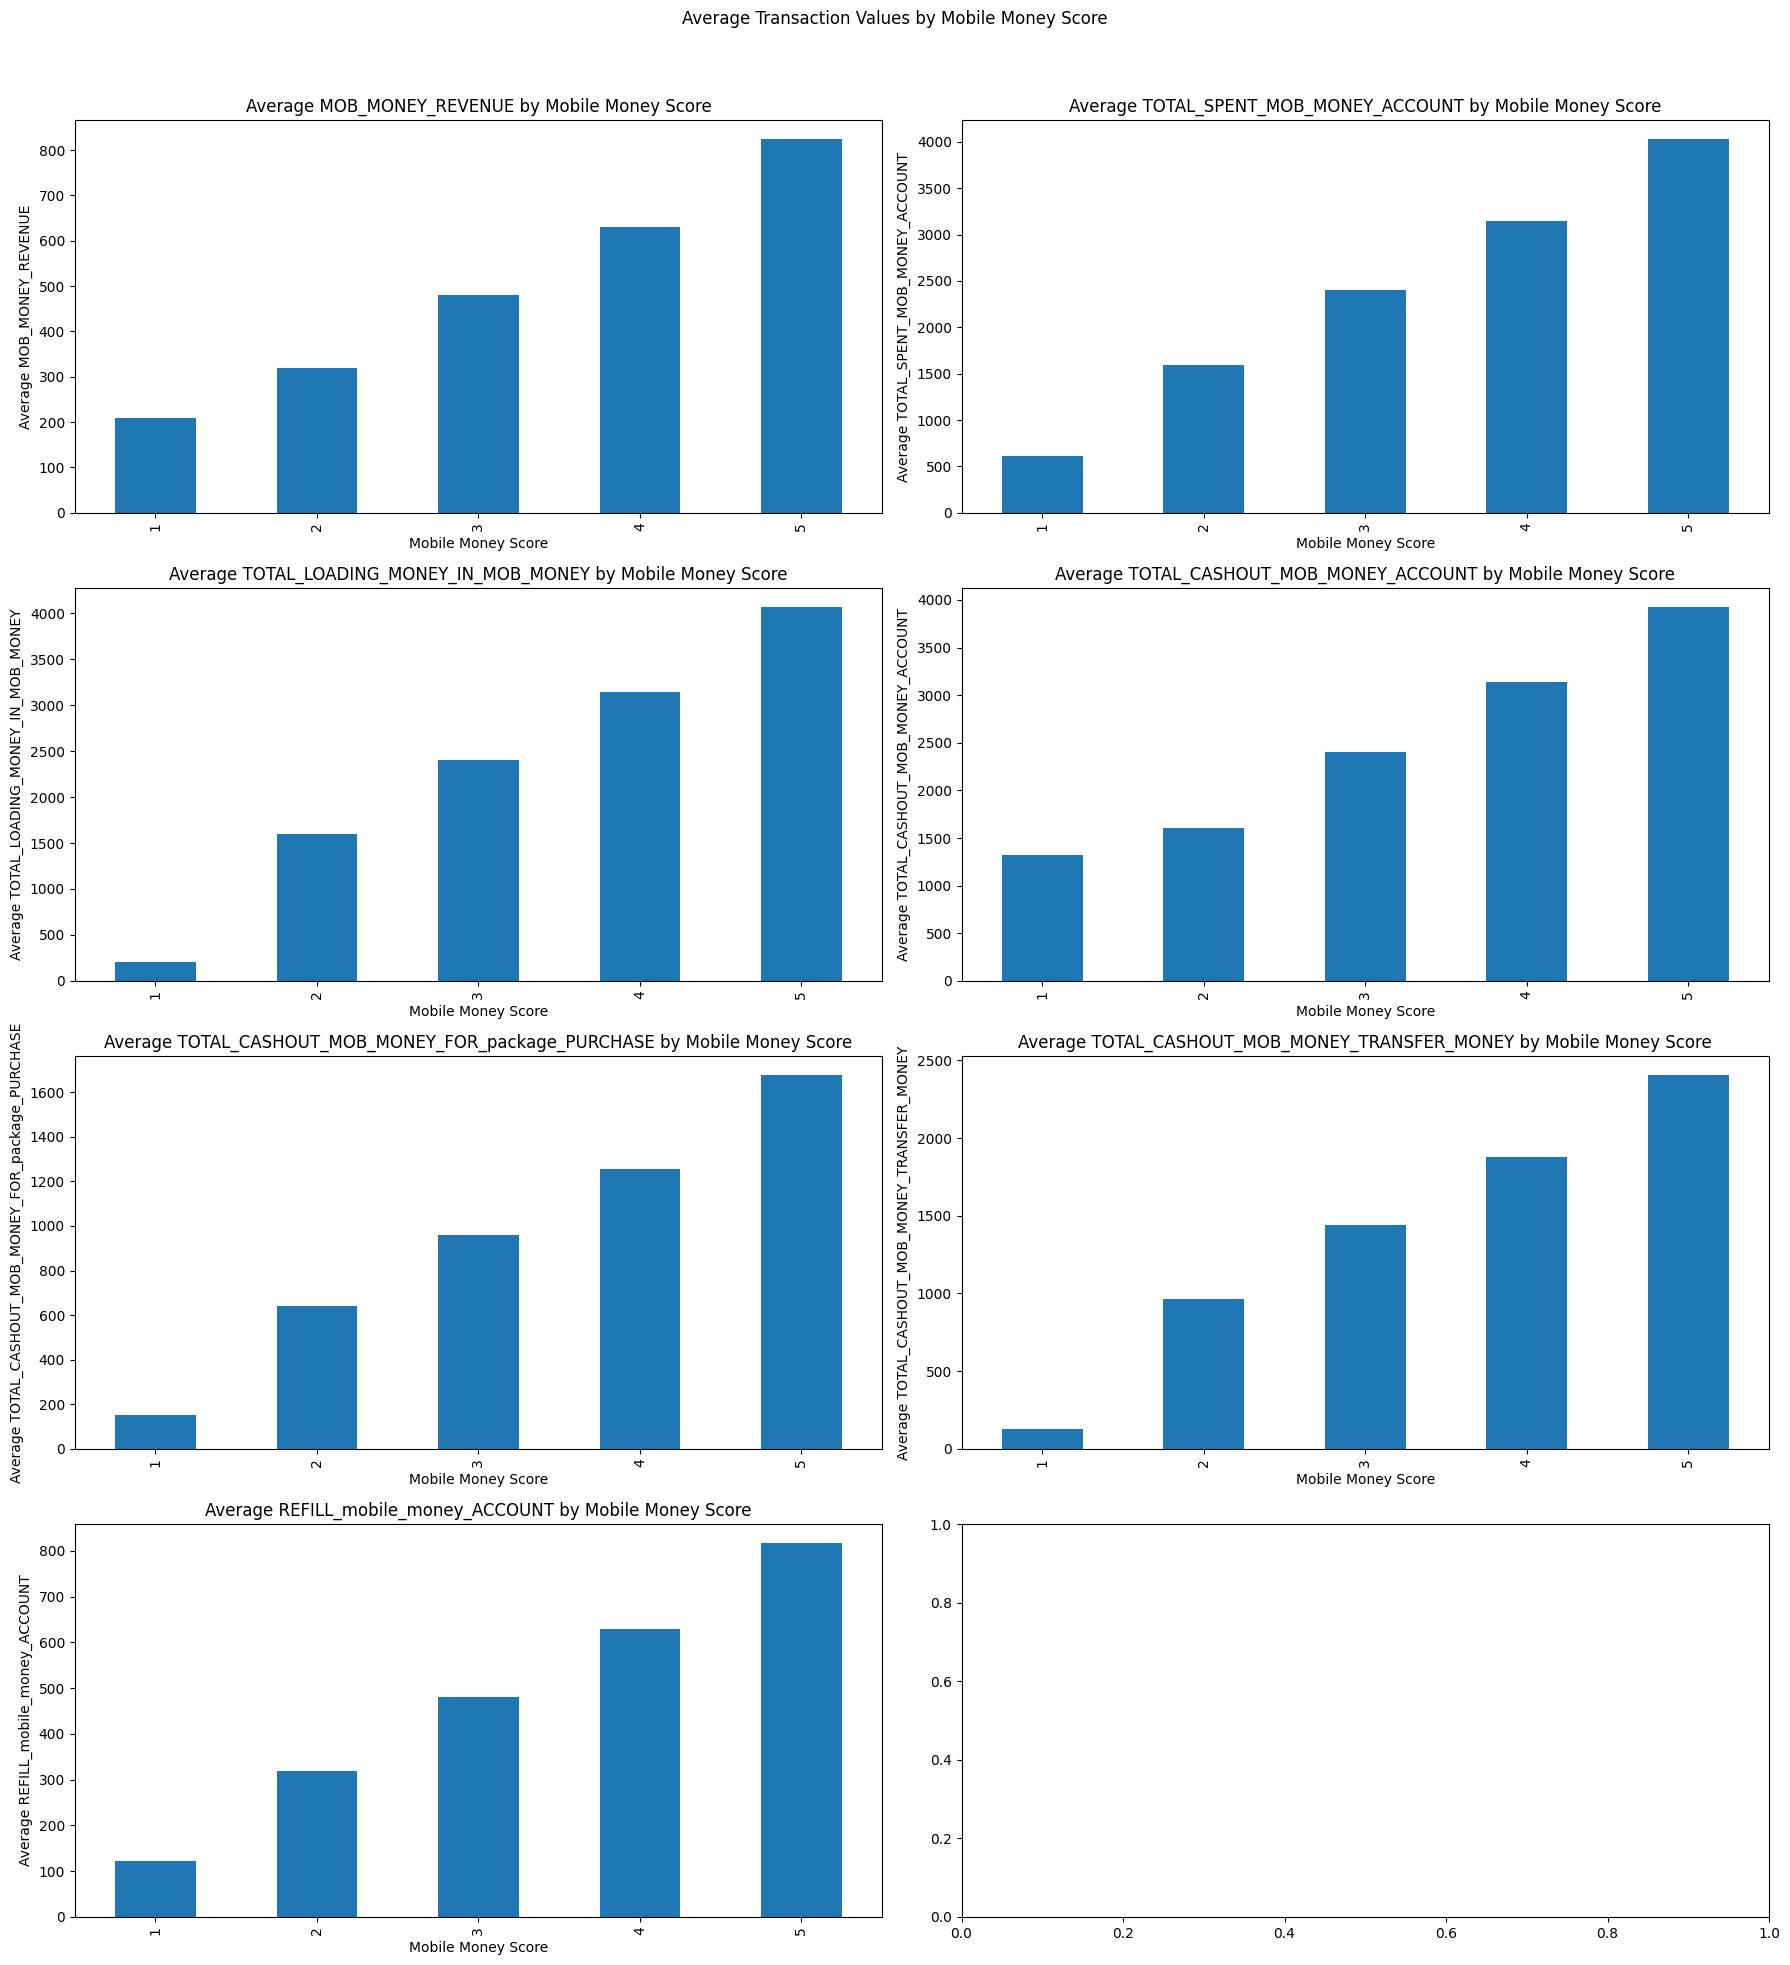

<Figure size 1400x800 with 0 Axes>

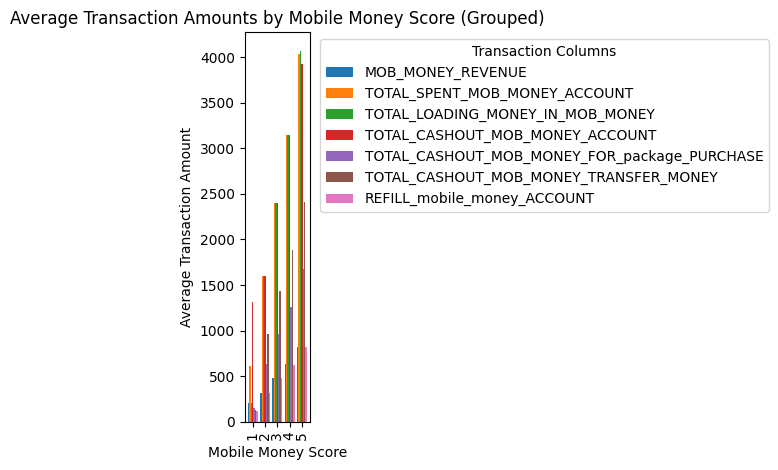

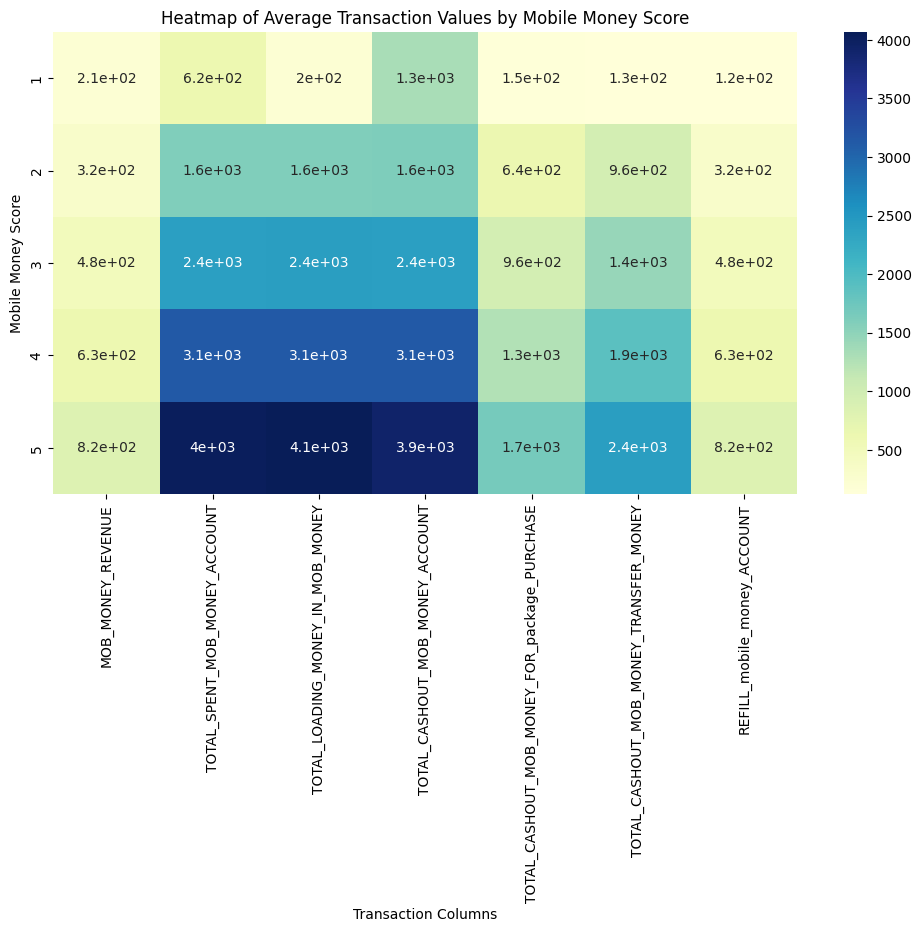

In [9]:
# 1. Plot average values of each transaction column for each Mobile Money Score as a bar plot
fig, axes = plt.subplots(4, 2, figsize=(18, 20))
fig.suptitle("Average Transaction Values by Mobile Money Score")

# Column list for iteration
transaction_cols_plot = transaction_columns.copy()  # Using transaction_columns as defined in previous code

# Plot each transaction column
for i, col in enumerate(transaction_cols_plot):
    ax = axes[i // 2, i % 2]  # Arrange subplots in 4x2 layout
    average_transaction_scores.plot(
        kind='bar', x='Mobile_Money_Score', y=col, ax=ax, legend=False
    )
    ax.set_title(f"Average {col} by Mobile Money Score")
    ax.set_xlabel("Mobile Money Score")
    ax.set_ylabel(f"Average {col}")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to accommodate suptitle
plt.show()

# 2. Overall Comparison: Plot all averages for each score in a grouped bar plot
plt.figure(figsize=(14, 8))
average_transaction_scores.set_index('Mobile_Money_Score').plot(kind='bar', stacked=False, width=0.8)
plt.title("Average Transaction Amounts by Mobile Money Score (Grouped)")
plt.xlabel("Mobile Money Score")
plt.ylabel("Average Transaction Amount")
plt.legend(title="Transaction Columns", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3. Heatmap to show transaction patterns across scores
plt.figure(figsize=(12, 6))
sns.heatmap(average_transaction_scores.set_index('Mobile_Money_Score'), annot=True, cmap="YlGnBu")
plt.title("Heatmap of Average Transaction Values by Mobile Money Score")
plt.xlabel("Transaction Columns")
plt.ylabel("Mobile Money Score")
plt.show()

/tmp/ipykernel_15721/2518650492.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=segmented_data, x='Mobile_Money_Score', palette='viridis')


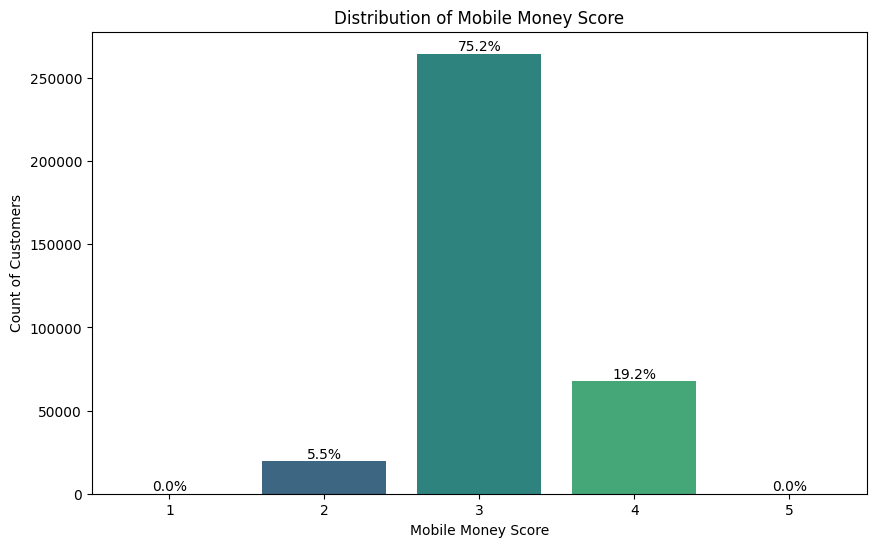

In [10]:
# Modified plot to display percentage of customers on top of each bar
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=segmented_data, x='Mobile_Money_Score', palette='viridis')
plt.title('Distribution of Mobile Money Score')
plt.xlabel('Mobile Money Score')
plt.ylabel('Count of Customers')

# Calculate percentages and annotate each bar with the percentage
total_count = len(segmented_data)  # Total number of customers for percentage calculation
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total_count:.1f}%'  # Calculate percentage
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')  # Position annotation at the top of the bar

plt.show()

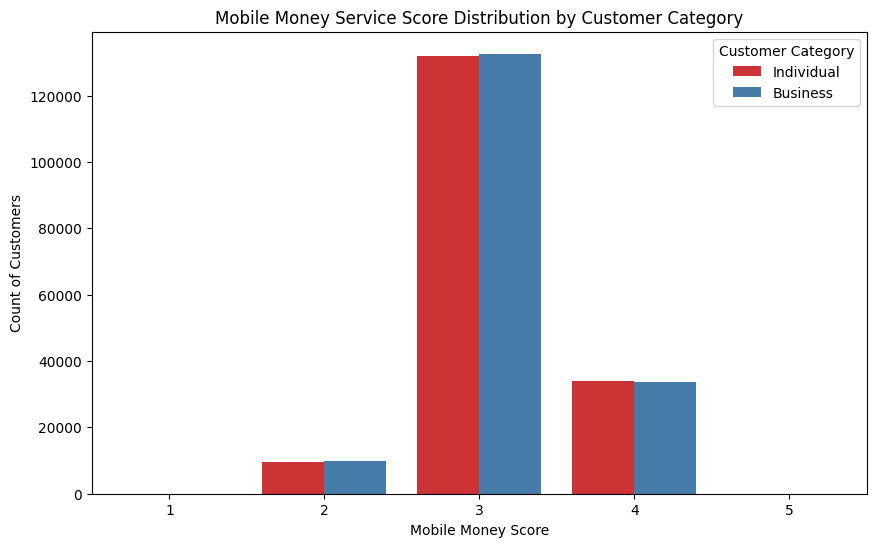

In [11]:
# Generate the grouped bar chart
plt.figure(figsize=(10, 6))
sns.countplot(data=segmented_data, x='Mobile_Money_Score', hue='CUST_CATEGORY', palette='Set1')
plt.title('Mobile Money Service Score Distribution by Customer Category')
plt.xlabel('Mobile Money Score')
plt.ylabel('Count of Customers')
plt.legend(title='Customer Category')
plt.show()
plt.close()

In [12]:
# List of data-related columns
data_columns = [
    'DATE_OF_THE_DAY',
    'SIM_NUMBER',

    'PAID_DATA_VOLUME',
    'DATA_REVENUE',

    'FREE_DATA_VOLUME',

    'NB_DATA_PACKAGES_SUBSCRIPTIONS',
    'NB_DATA_package_SUBS_VIA_POS',
    'NB_DATA_package_SUBS_VIA_MAIN_ACCOUNT',

    'IS_DATA_RGS90'
]

data_usage_columns = ['PAID_DATA_VOLUME', 'DATA_REVENUE', 'FREE_DATA_VOLUME']

data_subscription_columns = [
    'NB_DATA_PACKAGES_SUBSCRIPTIONS', 'NB_DATA_package_SUBS_VIA_POS',
    'NB_DATA_package_SUBS_VIA_MAIN_ACCOUNT'
]

In [13]:
segmented_data.Data_Service_Score.value_counts(normalize=True)*100

Data_Service_Score
3    60.325005
4    21.661530
2    17.412181
5     0.361054
1     0.240229
Name: proportion, dtype: float64

In [14]:
# Calculate the average of each specified column for each unique Data_Service_Score
data_columns_to_average = data_usage_columns + data_subscription_columns
average_data_scores = segmented_data.groupby('Data_Service_Score')[data_columns_to_average].mean().reset_index()

# Display the resulting dataframe
average_data_scores

,Data_Service_Score,PAID_DATA_VOLUME,DATA_REVENUE,FREE_DATA_VOLUME,NB_DATA_PACKAGES_SUBSCRIPTIONS,NB_DATA_package_SUBS_VIA_POS,NB_DATA_package_SUBS_VIA_MAIN_ACCOUNT
0,1,940.808817,58.538604,1826.336899,1.050888,0.429586,0.478107
1,2,1792.731735,106.462603,3556.985684,2.939148,1.283361,1.285157
2,3,2465.193763,148.143250,4928.597330,4.478331,1.974867,1.970880
3,4,3164.538103,189.381147,6312.408082,5.808712,2.662808,2.663792
4,5,4065.543748,243.883811,8048.169071,7.192126,3.566929,3.555118


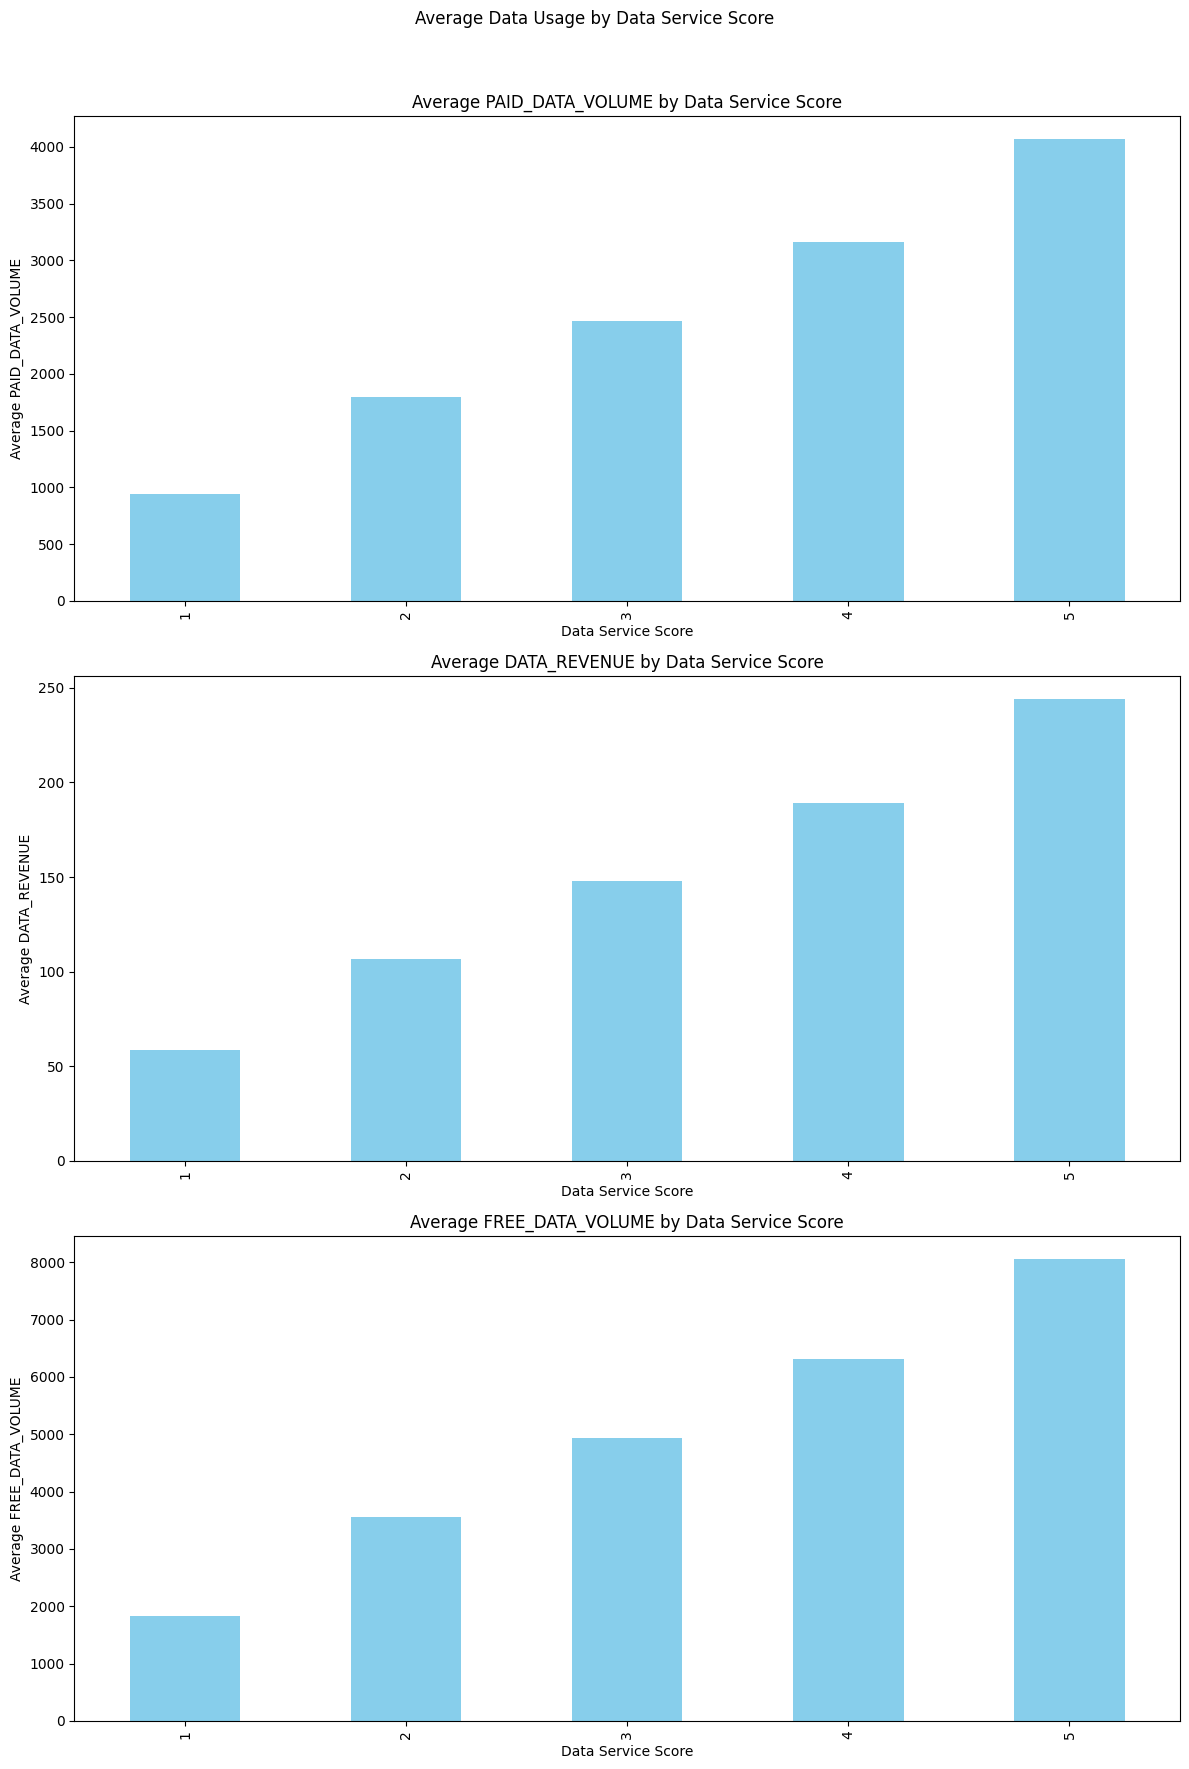

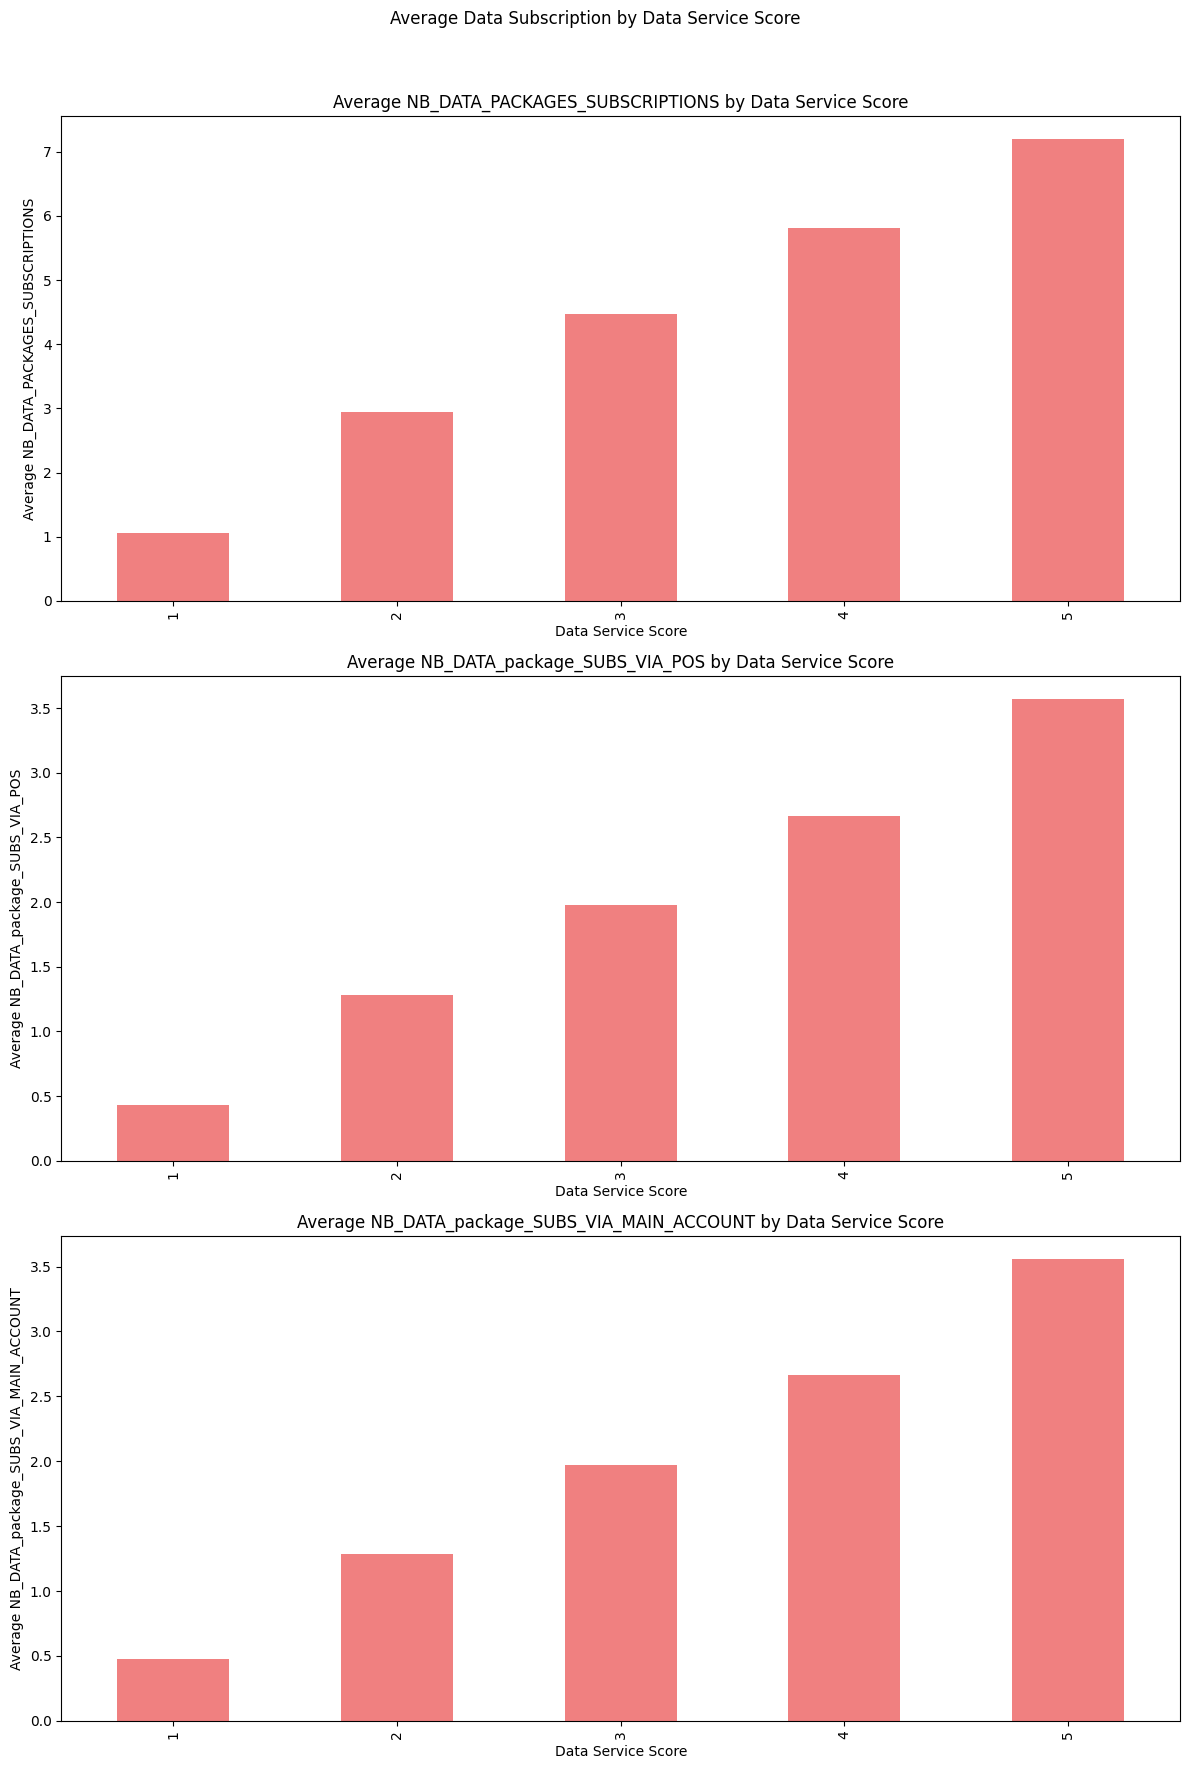

<Figure size 1400x800 with 0 Axes>

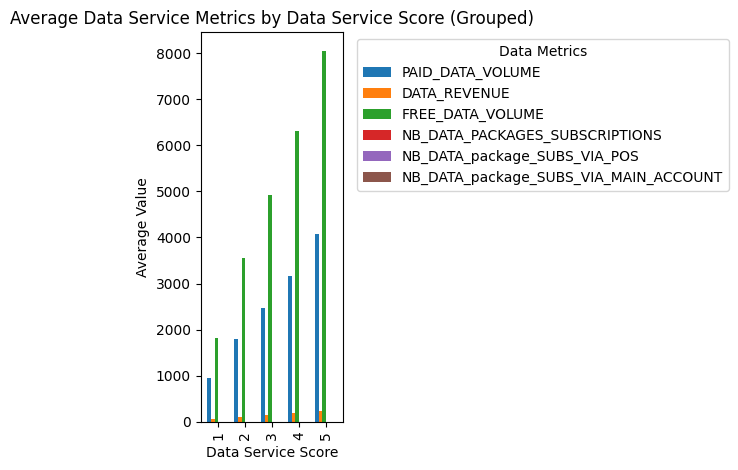

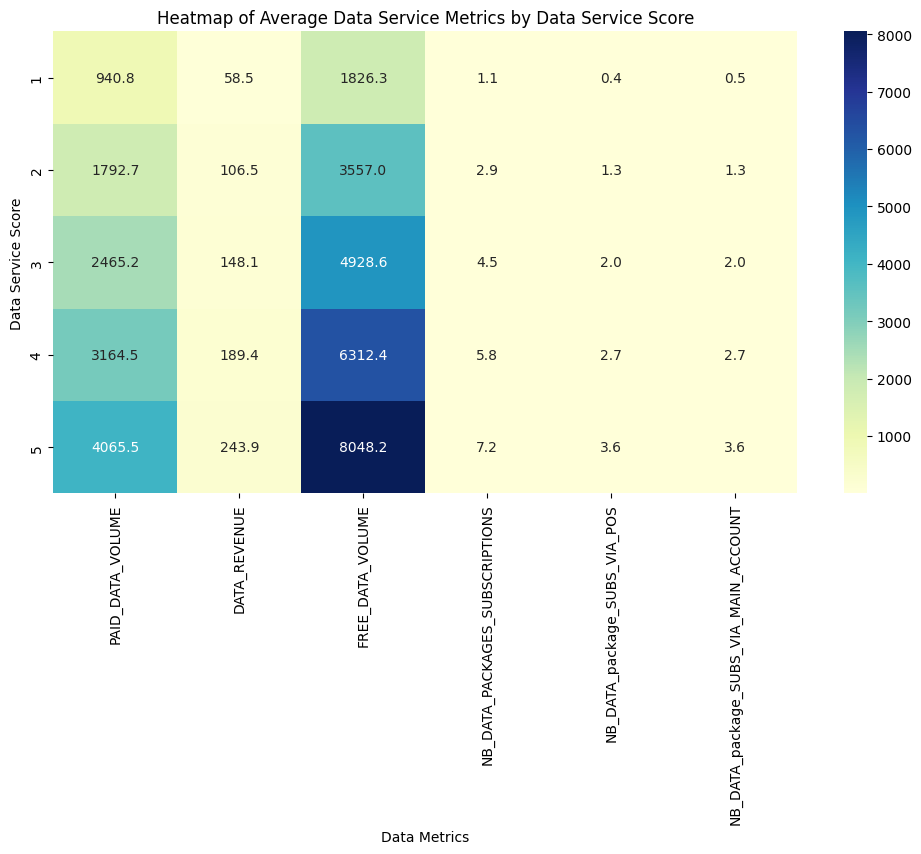

In [15]:
# 1. Plot each data usage column average by Data Service Score in separate subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 18))
fig.suptitle("Average Data Usage by Data Service Score")

# List of columns for iteration
data_usage_cols_plot = ['PAID_DATA_VOLUME', 'DATA_REVENUE', 'FREE_DATA_VOLUME']

# Plot each data usage column
for i, col in enumerate(data_usage_cols_plot):
    average_data_scores.plot(kind='bar', x='Data_Service_Score', y=col, ax=axes[i], legend=False, color='skyblue')
    axes[i].set_title(f"Average {col} by Data Service Score")
    axes[i].set_xlabel("Data Service Score")
    axes[i].set_ylabel(f"Average {col}")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to accommodate suptitle
plt.show()

# 2. Plot each data subscription column average by Data Service Score in separate subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 18))
fig.suptitle("Average Data Subscription by Data Service Score")

# List of subscription columns for iteration
data_subscription_cols_plot = ['NB_DATA_PACKAGES_SUBSCRIPTIONS', 'NB_DATA_package_SUBS_VIA_POS', 'NB_DATA_package_SUBS_VIA_MAIN_ACCOUNT']

# Plot each data subscription column
for i, col in enumerate(data_subscription_cols_plot):
    average_data_scores.plot(kind='bar', x='Data_Service_Score', y=col, ax=axes[i], legend=False, color='lightcoral')
    axes[i].set_title(f"Average {col} by Data Service Score")
    axes[i].set_xlabel("Data Service Score")
    axes[i].set_ylabel(f"Average {col}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 3. Overall Comparison: Plot all averages for each score in a grouped bar plot
plt.figure(figsize=(14, 8))
average_data_scores.set_index('Data_Service_Score').plot(kind='bar', stacked=False, width=0.8)
plt.title("Average Data Service Metrics by Data Service Score (Grouped)")
plt.xlabel("Data Service Score")
plt.ylabel("Average Value")
plt.legend(title="Data Metrics", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 4. Heatmap to show overall patterns across scores
plt.figure(figsize=(12, 6))
sns.heatmap(average_data_scores.set_index('Data_Service_Score'), annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Heatmap of Average Data Service Metrics by Data Service Score")
plt.xlabel("Data Metrics")
plt.ylabel("Data Service Score")
plt.show()

/tmp/ipykernel_15721/3495978098.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=segmented_data, x='Data_Service_Score', palette='plasma')


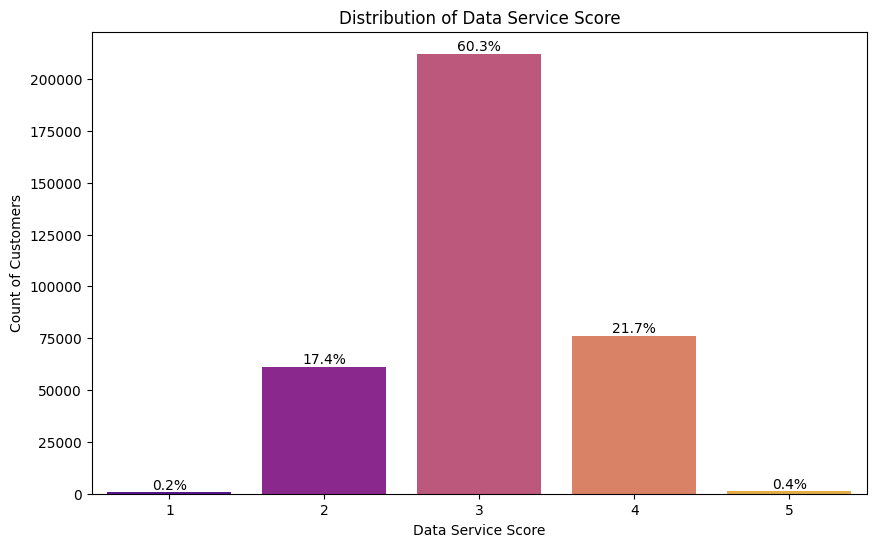

In [16]:
# Plot the distribution of Data_Service_Score with percentages on top of each bar
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=segmented_data, x='Data_Service_Score', palette='plasma')
plt.title('Distribution of Data Service Score')
plt.xlabel('Data Service Score')
plt.ylabel('Count of Customers')

# Calculate total customers for percentage calculation
total_count = len(segmented_data)

# Annotate each bar with the percentage
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total_count:.1f}%'  # Calculate percentage
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')  # Position annotation at the top of the bar

plt.show()

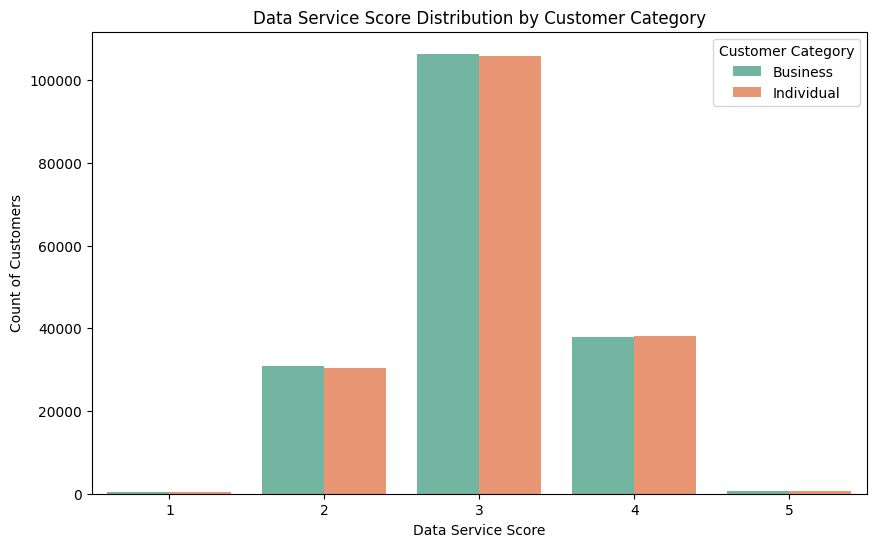

In [18]:
# Plot a grouped bar chart to visualize the count of each Data_Service_Score by Customer Category
plt.figure(figsize=(10, 6))
sns.countplot(data=segmented_data, x='Data_Service_Score', hue='CUST_CATEGORY', palette='Set2')
plt.title('Data Service Score Distribution by Customer Category')
plt.xlabel('Data Service Score')
plt.ylabel('Count of Customers')
plt.legend(title='Customer Category')
plt.show()

In [19]:
voice_columns = [
    'PAID_VOICE_TRAFFIC', 'VOICE_REVENUE', 'FREE_VOICE_TRAFFIC', 'VOICE_TRAFFIC_ONNET',
    'VOICE_TRAFFIC_OFFNET', 'NB_CALLS_EMITTED_ONNET', 'NB_CALLS_RECEIVED_ONNET',
    'NB_CALLS_EMITTED_OFFNET', 'NB_CALLS_RECEIVED_OFFNET', 'VOICE_OUTGOING_TRAFFIC_INTERNATIONAL',
    'VOICE_INCOMING_TRAFFIC_INTERNATIONAL', 'VOICE_OUTGOING_TRAFFIC_ONNET', 'VOICE_INCOMING_TRAFFIC_ONNET',
    'VOICE_OUTGOING_TRAFFIC_OFFNET', 'VOICE_INCOMING_TRAFFIC_OFFNET', 'NB_VOICE_PACKAGES_SUBSCRIPTIONS',
    'VOICE_PACKAGES_REVENUE', 'NB_VOICE_PACKAGES_SUBS_VIA_POS', 'NB_VOICE_PACKAGES_SUBS_VIA_MAIN_ACCOUNT'
]

# Define columns specifically for voice usage and subscription
voice_usage_columns = [
    'PAID_VOICE_TRAFFIC', 'VOICE_REVENUE', 'FREE_VOICE_TRAFFIC', 'VOICE_TRAFFIC_ONNET',
    'VOICE_TRAFFIC_OFFNET', 'VOICE_OUTGOING_TRAFFIC_INTERNATIONAL', 'VOICE_INCOMING_TRAFFIC_INTERNATIONAL',
    'VOICE_OUTGOING_TRAFFIC_ONNET', 'VOICE_INCOMING_TRAFFIC_ONNET',
    'VOICE_OUTGOING_TRAFFIC_OFFNET', 'VOICE_INCOMING_TRAFFIC_OFFNET',
    'NB_CALLS_EMITTED_ONNET', 'NB_CALLS_RECEIVED_ONNET', 'NB_CALLS_EMITTED_OFFNET',
    'NB_CALLS_RECEIVED_OFFNET', 'VOICE_PACKAGES_REVENUE'
]

voice_subscription_columns = [
    'NB_VOICE_PACKAGES_SUBSCRIPTIONS', 'NB_VOICE_PACKAGES_SUBS_VIA_POS',
    'NB_VOICE_PACKAGES_SUBS_VIA_MAIN_ACCOUNT'
]

In [20]:
segmented_data.Voice_Service_Score.value_counts(normalize=True)

Voice_Service_Score
3    0.866663
4    0.095261
2    0.038076
Name: proportion, dtype: float64

In [21]:
# Calculate the average of each specified column for each unique Voice_Service_Score
voice_columns_to_average = voice_usage_columns + voice_subscription_columns
average_voice_scores = segmented_data.groupby('Voice_Service_Score')[voice_columns_to_average].mean().reset_index()

# Display the resulting dataframe
average_voice_scores

,Voice_Service_Score,PAID_VOICE_TRAFFIC,VOICE_REVENUE,FREE_VOICE_TRAFFIC,VOICE_TRAFFIC_ONNET,VOICE_TRAFFIC_OFFNET,VOICE_OUTGOING_TRAFFIC_INTERNATIONAL,VOICE_INCOMING_TRAFFIC_INTERNATIONAL,VOICE_OUTGOING_TRAFFIC_ONNET,VOICE_INCOMING_TRAFFIC_ONNET,VOICE_OUTGOING_TRAFFIC_OFFNET,VOICE_INCOMING_TRAFFIC_OFFNET,NB_CALLS_EMITTED_ONNET,NB_CALLS_RECEIVED_ONNET,NB_CALLS_EMITTED_OFFNET,NB_CALLS_RECEIVED_OFFNET,VOICE_PACKAGES_REVENUE,NB_VOICE_PACKAGES_SUBSCRIPTIONS,NB_VOICE_PACKAGES_SUBS_VIA_POS,NB_VOICE_PACKAGES_SUBS_VIA_MAIN_ACCOUNT
0,2,725.408748,181.366169,361.420564,180.099750,179.080581,72.265861,72.132221,179.081269,179.569062,181.380762,181.374218,17.706862,17.337788,17.401105,17.433137,71.766706,3.122004,1.182035,1.407900
1,3,986.387461,246.219286,493.106718,246.458327,246.288633,98.630128,98.648653,246.671183,247.026752,246.701824,246.825100,24.173293,24.168694,24.155678,24.187028,98.757741,4.439896,1.971605,1.971153
2,4,1231.385764,308.268570,614.870832,307.995660,306.595455,123.162203,123.369122,307.547356,307.536784,307.311831,308.898695,30.289632,30.284231,30.206458,30.341530,123.310735,5.657753,2.594604,2.458159


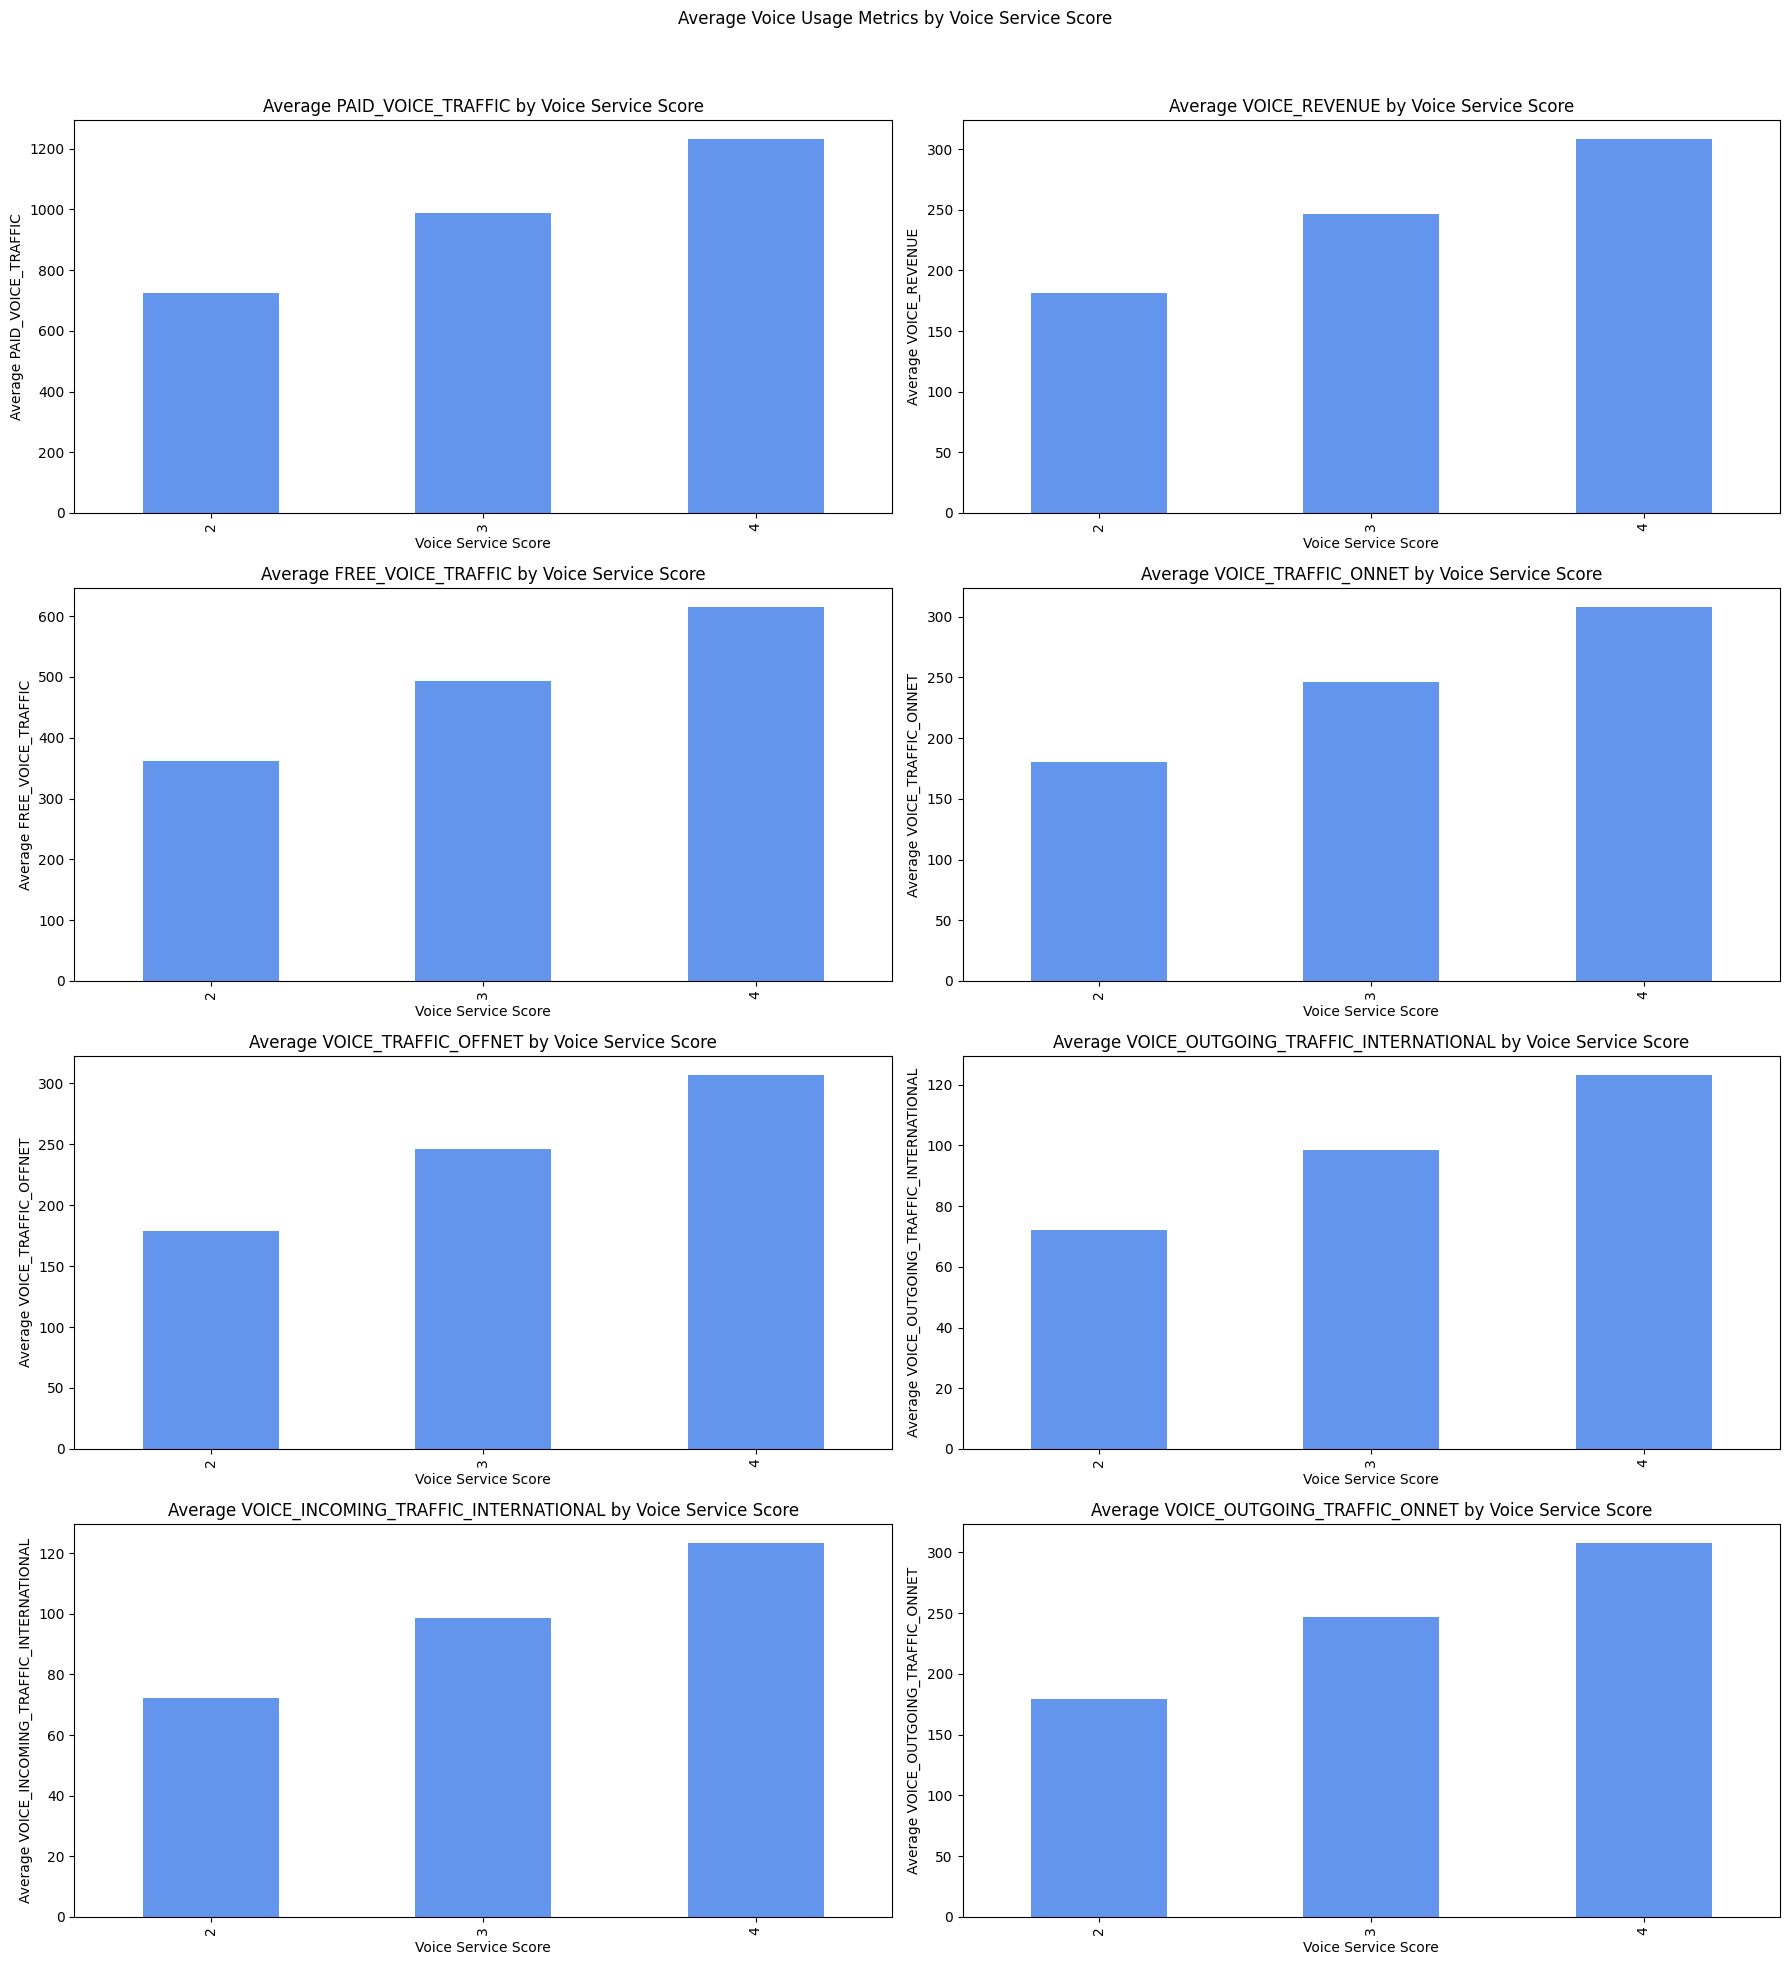

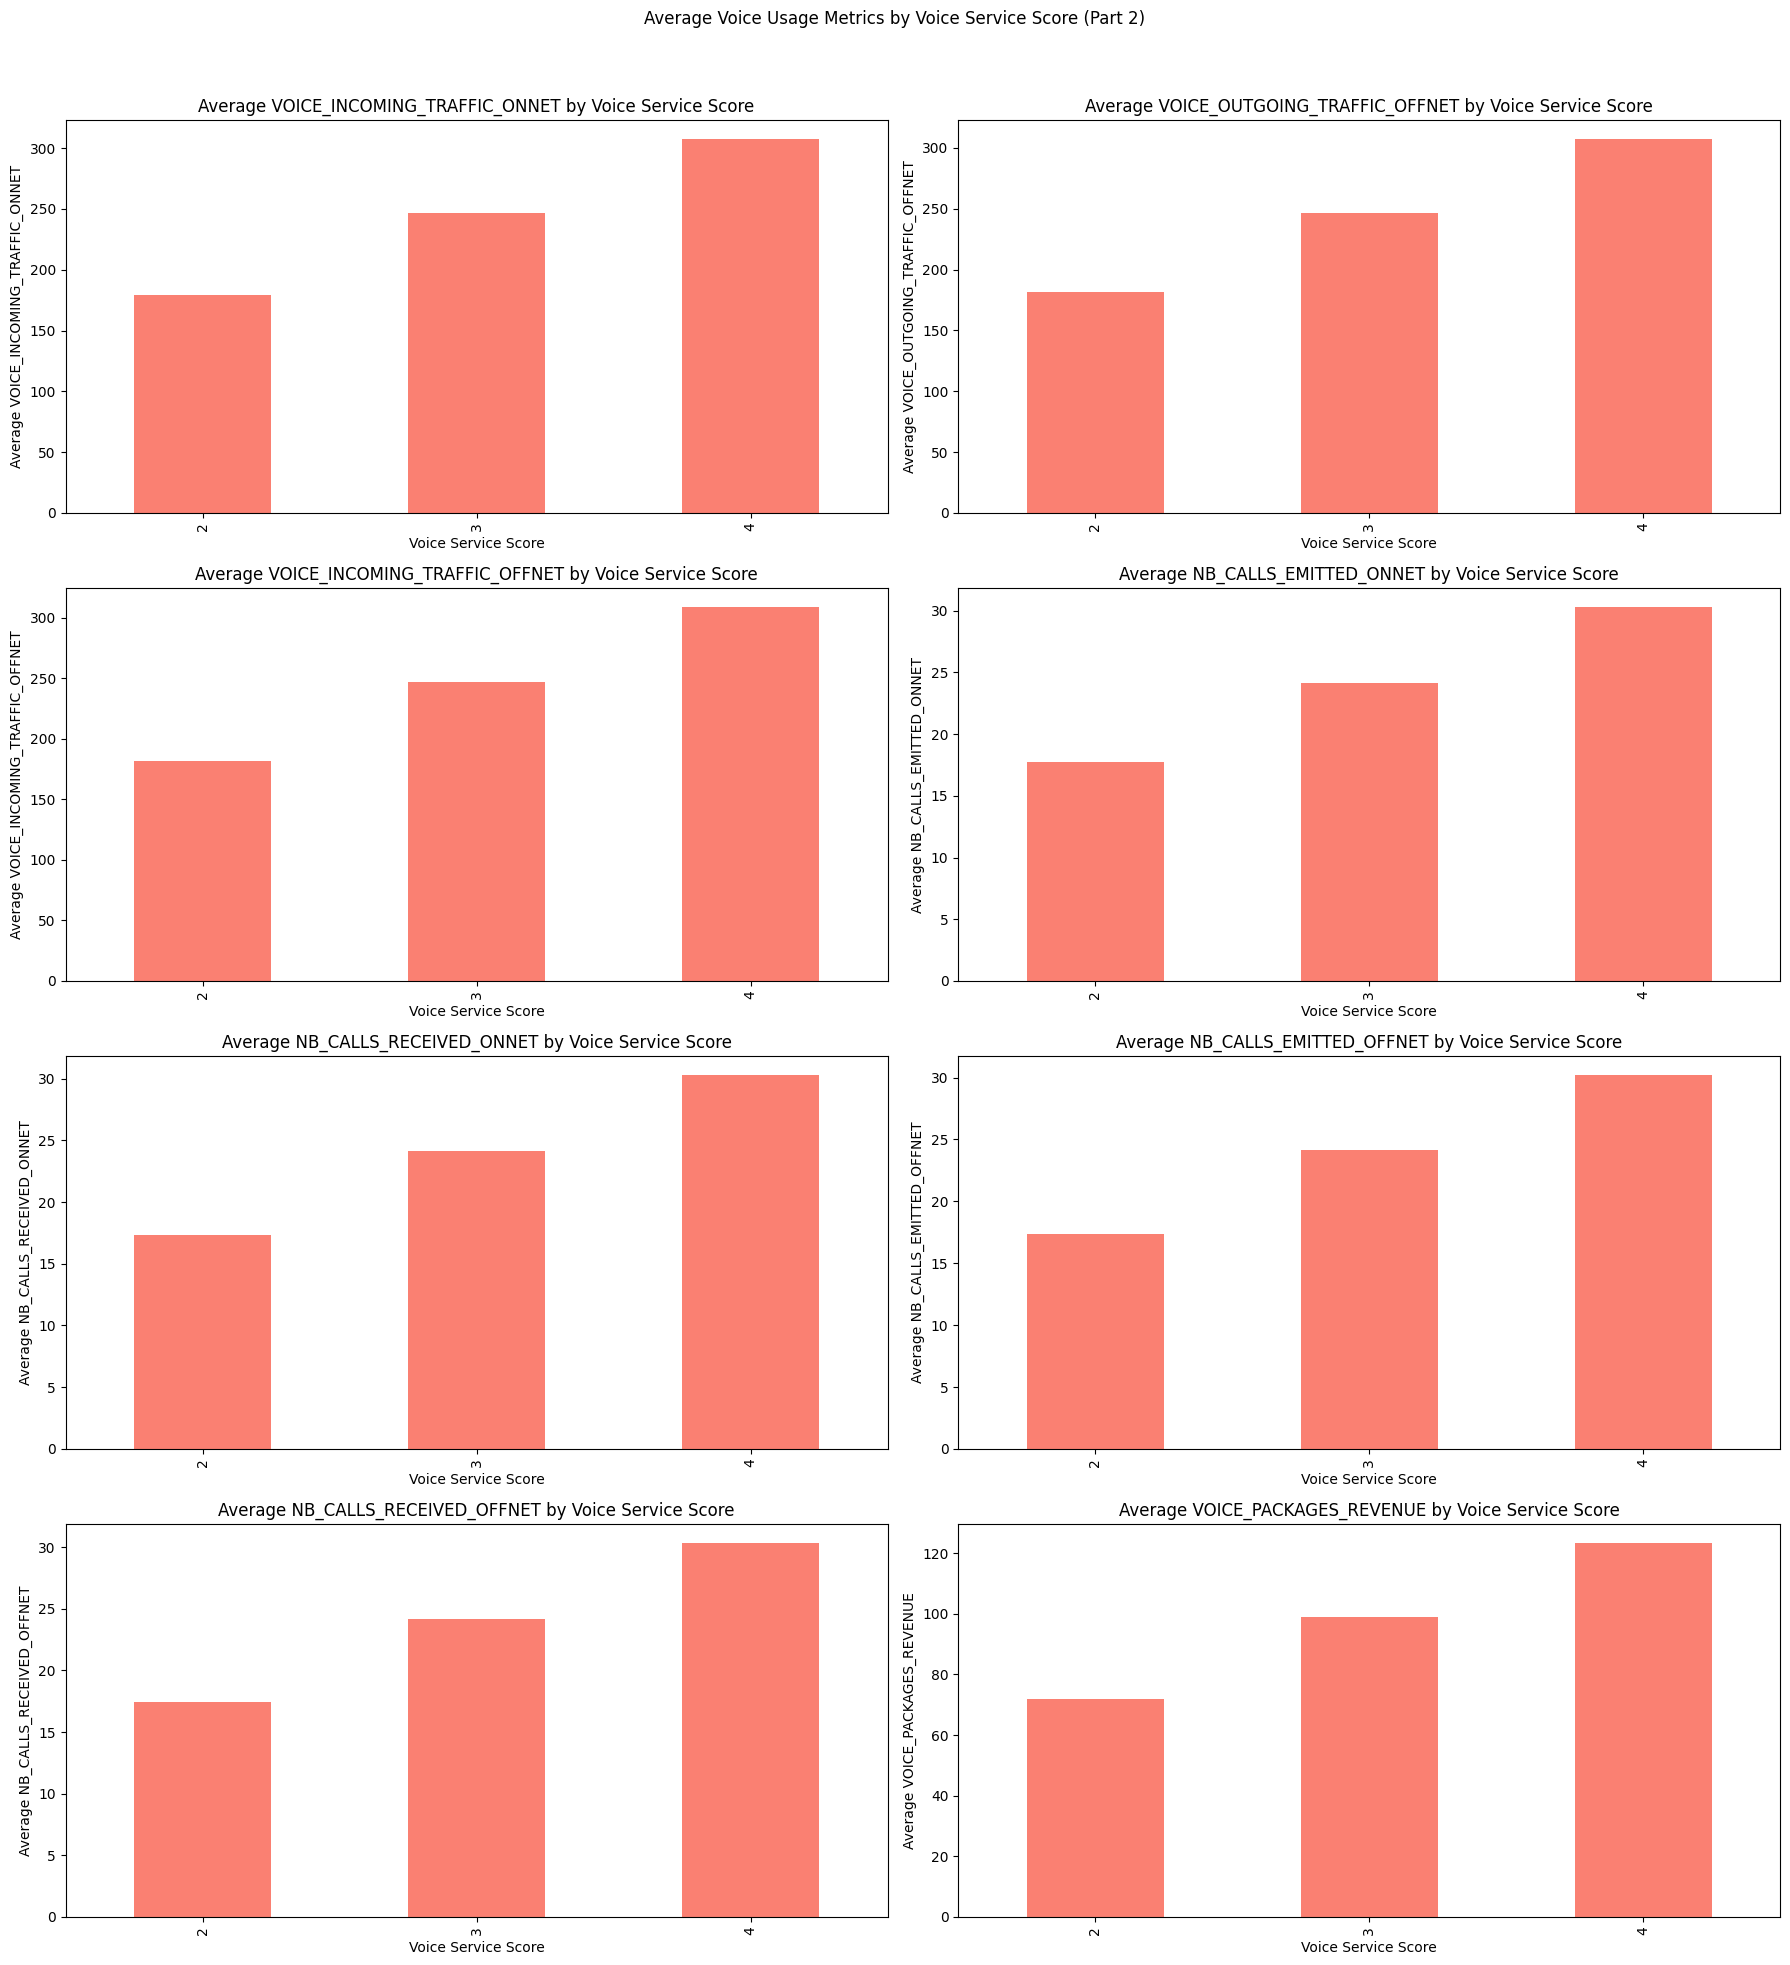

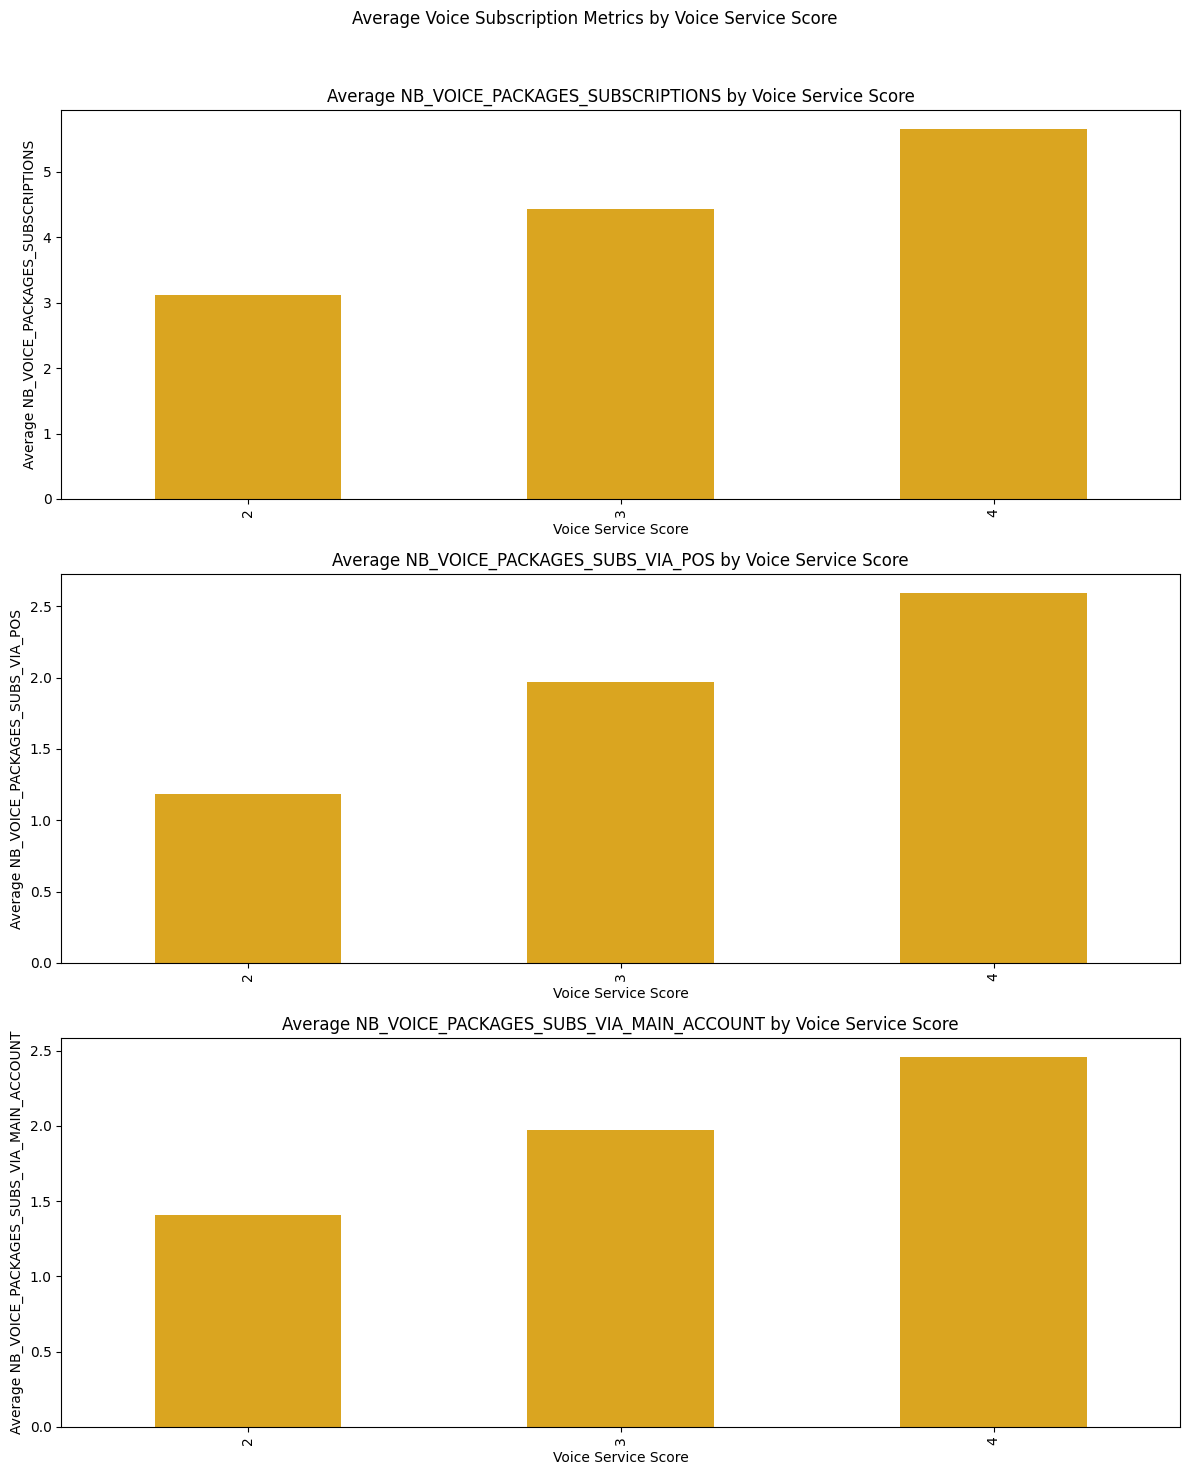

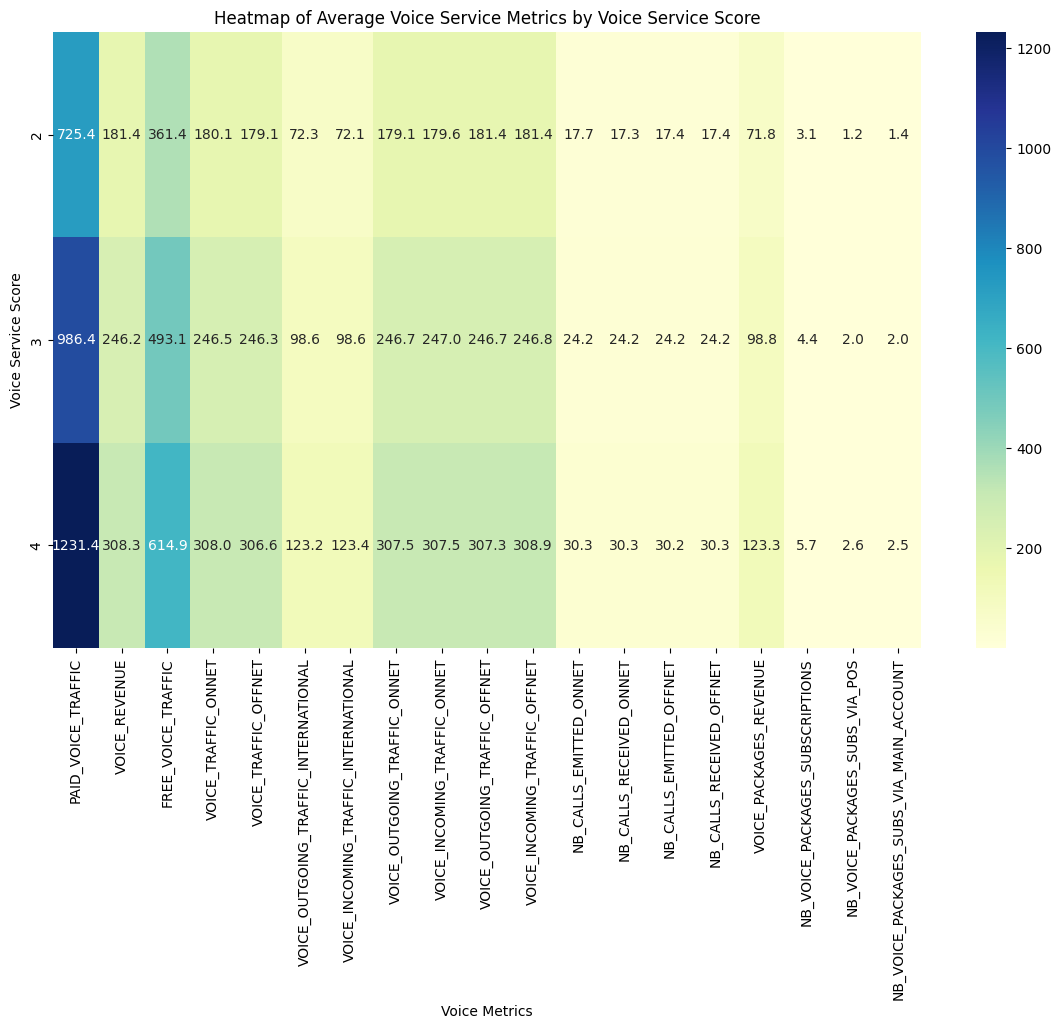

In [22]:
# 1. Plot each voice usage column average by Voice Service Score in separate subplots
fig, axes = plt.subplots(4, 2, figsize=(18, 20))
fig.suptitle("Average Voice Usage Metrics by Voice Service Score")

# Column list for iteration (first 8 usage metrics)
voice_usage_cols_plot_1 = [
    'PAID_VOICE_TRAFFIC', 'VOICE_REVENUE', 'FREE_VOICE_TRAFFIC', 'VOICE_TRAFFIC_ONNET',
    'VOICE_TRAFFIC_OFFNET', 'VOICE_OUTGOING_TRAFFIC_INTERNATIONAL',
    'VOICE_INCOMING_TRAFFIC_INTERNATIONAL', 'VOICE_OUTGOING_TRAFFIC_ONNET'
]

# Plot first set of usage columns
for i, col in enumerate(voice_usage_cols_plot_1):
    ax = axes[i // 2, i % 2]
    average_voice_scores.plot(kind='bar', x='Voice_Service_Score', y=col, ax=ax, legend=False, color='cornflowerblue')
    ax.set_title(f"Average {col} by Voice Service Score")
    ax.set_xlabel("Voice Service Score")
    ax.set_ylabel(f"Average {col}")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to accommodate suptitle
plt.show()

# 2. Plot remaining voice usage columns in separate subplots
fig, axes = plt.subplots(4, 2, figsize=(18, 20))
fig.suptitle("Average Voice Usage Metrics by Voice Service Score (Part 2)")

# Column list for iteration (remaining usage metrics)
voice_usage_cols_plot_2 = [
    'VOICE_INCOMING_TRAFFIC_ONNET', 'VOICE_OUTGOING_TRAFFIC_OFFNET', 'VOICE_INCOMING_TRAFFIC_OFFNET',
    'NB_CALLS_EMITTED_ONNET', 'NB_CALLS_RECEIVED_ONNET', 'NB_CALLS_EMITTED_OFFNET',
    'NB_CALLS_RECEIVED_OFFNET', 'VOICE_PACKAGES_REVENUE'
]

# Plot second set of usage columns
for i, col in enumerate(voice_usage_cols_plot_2):
    ax = axes[i // 2, i % 2]
    average_voice_scores.plot(kind='bar', x='Voice_Service_Score', y=col, ax=ax, legend=False, color='salmon')
    ax.set_title(f"Average {col} by Voice Service Score")
    ax.set_xlabel("Voice Service Score")
    ax.set_ylabel(f"Average {col}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 3. Plot voice subscription metrics by Voice Service Score in separate subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 15))
fig.suptitle("Average Voice Subscription Metrics by Voice Service Score")

# Subscription column list
voice_subscription_cols_plot = ['NB_VOICE_PACKAGES_SUBSCRIPTIONS', 'NB_VOICE_PACKAGES_SUBS_VIA_POS', 'NB_VOICE_PACKAGES_SUBS_VIA_MAIN_ACCOUNT']

# Plot subscription columns
for i, col in enumerate(voice_subscription_cols_plot):
    average_voice_scores.plot(kind='bar', x='Voice_Service_Score', y=col, ax=axes[i], legend=False, color='goldenrod')
    axes[i].set_title(f"Average {col} by Voice Service Score")
    axes[i].set_xlabel("Voice Service Score")
    axes[i].set_ylabel(f"Average {col}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 4. Heatmap to show overall patterns across scores
plt.figure(figsize=(14, 8))
sns.heatmap(average_voice_scores.set_index('Voice_Service_Score'), annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Heatmap of Average Voice Service Metrics by Voice Service Score")
plt.xlabel("Voice Metrics")
plt.ylabel("Voice Service Score")
plt.show()

/tmp/ipykernel_15721/869646106.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=segmented_data, x='Voice_Service_Score', palette='plasma')


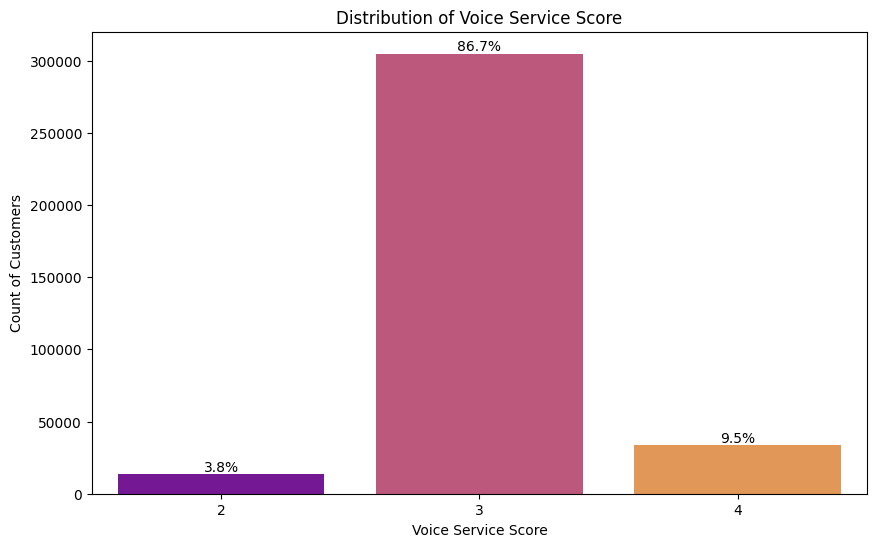

In [23]:
# Plot the distribution of Voice_Service_Score with percentages on top of each bar
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=segmented_data, x='Voice_Service_Score', palette='plasma')
plt.title('Distribution of Voice Service Score')
plt.xlabel('Voice Service Score')
plt.ylabel('Count of Customers')

# Calculate total number of customers to use for percentage calculation
total_count = len(segmented_data)

# Annotate each bar with the percentage of customers
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total_count:.1f}%'  # Calculate percentage
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')  # Position annotation at the top of the bar

plt.show()
plt.close()

/tmp/ipykernel_15721/3516796934.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=segmented_data, x='CUST_CATEGORY', y='Voice_Service_Score', palette='coolwarm')


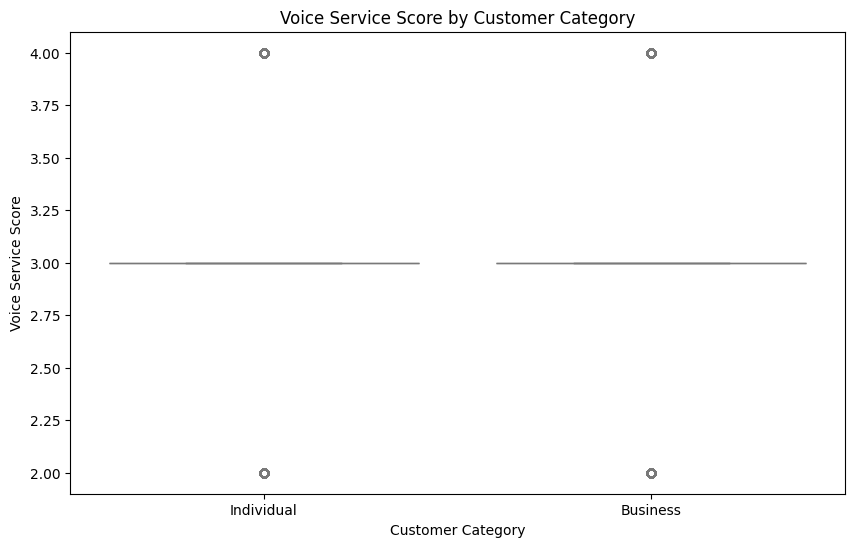

In [25]:
# Generate and save the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=segmented_data, x='CUST_CATEGORY', y='Voice_Service_Score', palette='coolwarm')
plt.title('Voice Service Score by Customer Category')
plt.xlabel('Customer Category')
plt.ylabel('Voice Service Score')
plt.show()
plt.close()

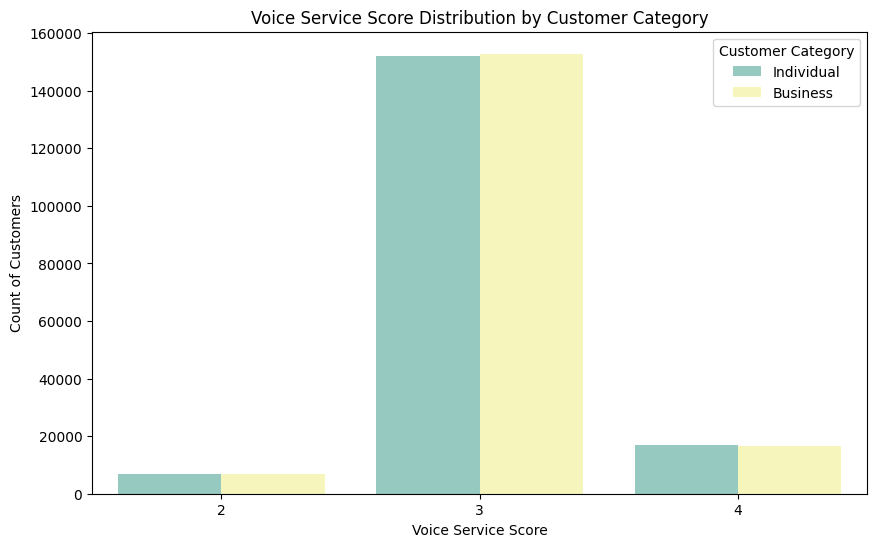

In [24]:
# Generate and save the grouped bar chart
plt.figure(figsize=(10, 6))
sns.countplot(data=segmented_data, x='Voice_Service_Score', hue='CUST_CATEGORY', palette='Set3')
plt.title('Voice Service Score Distribution by Customer Category')
plt.xlabel('Voice Service Score')
plt.ylabel('Count of Customers')
plt.legend(title='Customer Category')
plt.show()
plt.close()

In [26]:
# List of SMS-related columns
sms_columns = [
    'SMS_REVENUE',
    'NB_SMS_SENT_ONNET',
    'NB_SMS_SENT_OFFNET',
    'NB_SMS_RECEIVED_ONNET',
    'NB_SMS_RECEIVED_OFFNET',
    'NB_SMS_SENT_INTERNATIONAL',
    'NB_SMS_RECEIVED_INTERNATIONAL',
    'NB_SMS_PACKAGES_SUBSCRIPTIONS',
    'SMS_PACKAGE_REVENUE',
    'NB_SMS_package_SUBS_VIA_POS',
    'NB_SMS_package_SUBS_VIA_MAIN_ACCOUNT'
]

# Define columns specifically for SMS usage and subscription
sms_usage_columns = [
    'SMS_REVENUE', 'NB_SMS_SENT_ONNET', 'NB_SMS_SENT_OFFNET', 'NB_SMS_RECEIVED_ONNET',
    'NB_SMS_RECEIVED_OFFNET', 'NB_SMS_SENT_INTERNATIONAL', 'NB_SMS_RECEIVED_INTERNATIONAL',
    'SMS_PACKAGE_REVENUE'
]

sms_subscription_columns = [
    'NB_SMS_PACKAGES_SUBSCRIPTIONS', 'NB_SMS_package_SUBS_VIA_POS',
    'NB_SMS_package_SUBS_VIA_MAIN_ACCOUNT'
]

In [27]:
segmented_data.SMS_Service_Score.value_counts(normalize=True)

SMS_Service_Score
3    0.734827
4    0.194642
2    0.070235
5    0.000253
1    0.000043
Name: proportion, dtype: float64

In [28]:
# Calculate the average of each specified column for each unique SMS_Service_Score
sms_columns_to_average = sms_usage_columns + sms_subscription_columns
average_sms_scores = segmented_data.groupby('SMS_Service_Score')[sms_columns_to_average].mean().reset_index()

# Display the resulting dataframe
average_sms_scores

,SMS_Service_Score,SMS_REVENUE,NB_SMS_SENT_ONNET,NB_SMS_SENT_OFFNET,NB_SMS_RECEIVED_ONNET,NB_SMS_RECEIVED_OFFNET,NB_SMS_SENT_INTERNATIONAL,NB_SMS_RECEIVED_INTERNATIONAL,SMS_PACKAGE_REVENUE,NB_SMS_PACKAGES_SUBSCRIPTIONS,NB_SMS_package_SUBS_VIA_POS,NB_SMS_package_SUBS_VIA_MAIN_ACCOUNT
0,1,20.700000,10.066667,8.466667,9.466667,9.733333,1.066667,1.933333,14.978667,0.866667,0.000000,0.200000
1,2,33.865218,16.581218,16.599231,16.409472,16.420279,2.871524,3.087958,33.841860,2.940417,1.095082,1.192957
2,3,48.217583,23.617196,23.661246,23.612112,23.624566,4.330544,4.335020,48.204382,4.343636,1.935514,1.941182
3,4,62.348220,30.709341,30.619192,30.695275,30.682918,5.737983,5.647689,62.269652,5.665712,2.562024,2.511254
4,5,84.019888,40.887640,39.280899,39.134831,40.213483,7.528090,7.280899,82.385730,7.280899,3.303371,3.269663


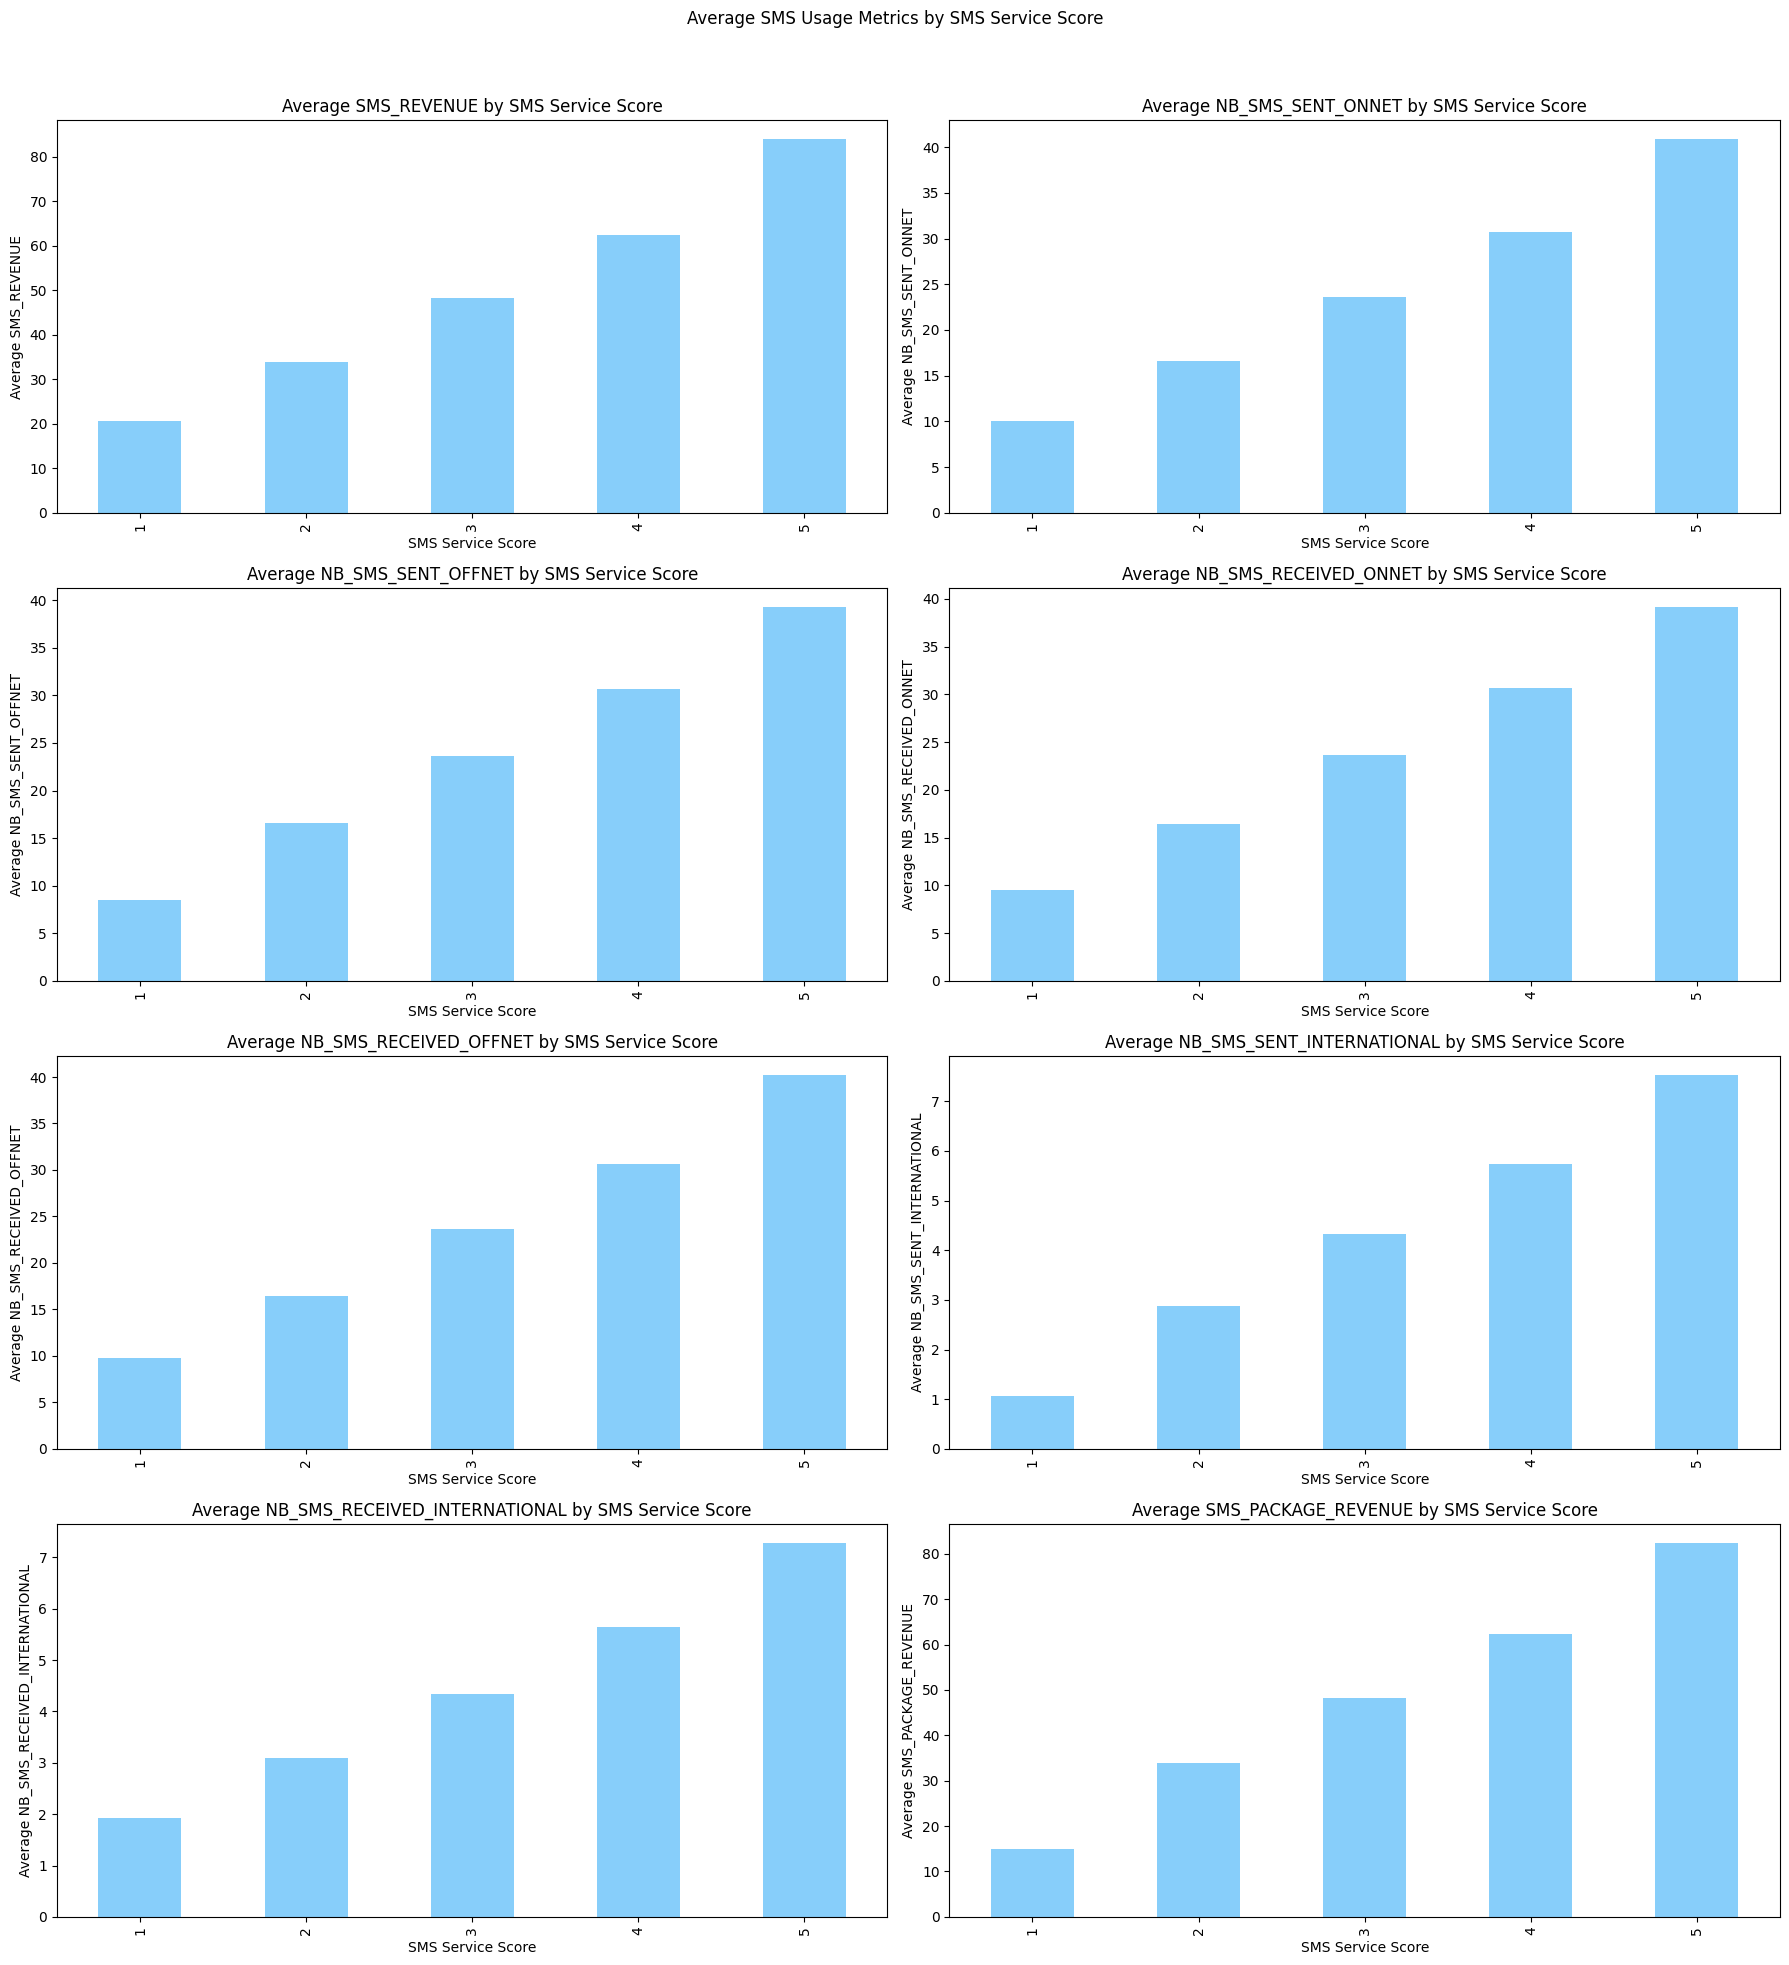

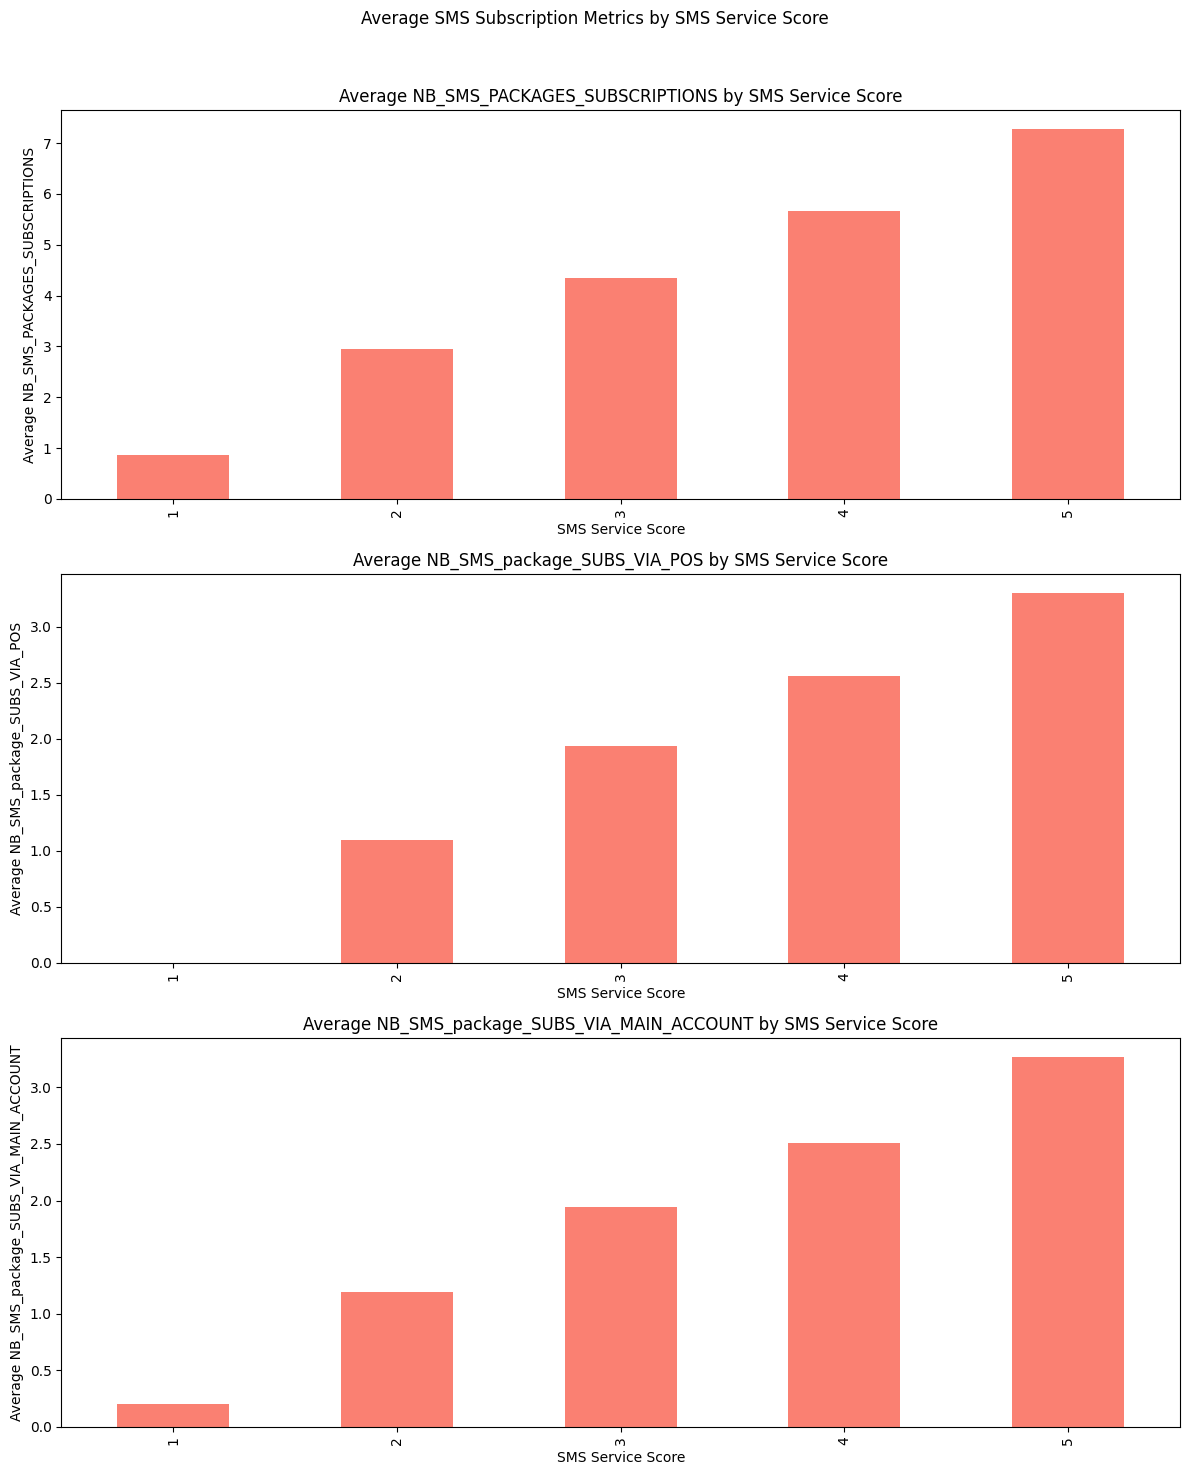

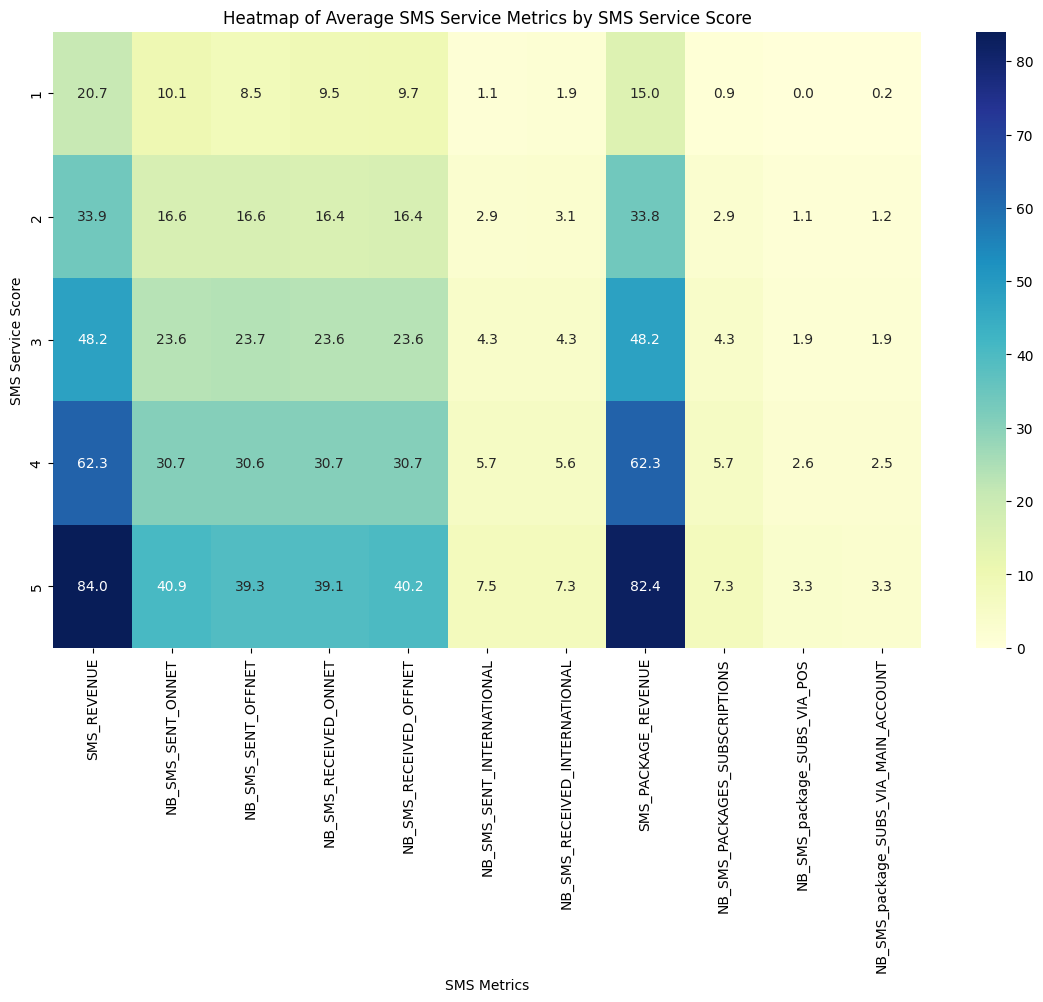

In [29]:
# 1. Plot each SMS usage column average by SMS Service Score in separate subplots
fig, axes = plt.subplots(4, 2, figsize=(18, 20))
fig.suptitle("Average SMS Usage Metrics by SMS Service Score")

# Column list for SMS usage columns
sms_usage_cols_plot = [
    'SMS_REVENUE', 'NB_SMS_SENT_ONNET', 'NB_SMS_SENT_OFFNET', 'NB_SMS_RECEIVED_ONNET',
    'NB_SMS_RECEIVED_OFFNET', 'NB_SMS_SENT_INTERNATIONAL', 'NB_SMS_RECEIVED_INTERNATIONAL',
    'SMS_PACKAGE_REVENUE'
]

# Plot each SMS usage column
for i, col in enumerate(sms_usage_cols_plot):
    ax = axes[i // 2, i % 2]
    average_sms_scores.plot(kind='bar', x='SMS_Service_Score', y=col, ax=ax, legend=False, color='lightskyblue')
    ax.set_title(f"Average {col} by SMS Service Score")
    ax.set_xlabel("SMS Service Score")
    ax.set_ylabel(f"Average {col}")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to accommodate suptitle
plt.show()

# 2. Plot SMS subscription metrics by SMS Service Score in separate subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 15))
fig.suptitle("Average SMS Subscription Metrics by SMS Service Score")

# SMS subscription columns for iteration
sms_subscription_cols_plot = ['NB_SMS_PACKAGES_SUBSCRIPTIONS', 'NB_SMS_package_SUBS_VIA_POS', 'NB_SMS_package_SUBS_VIA_MAIN_ACCOUNT']

# Plot each SMS subscription column
for i, col in enumerate(sms_subscription_cols_plot):
    average_sms_scores.plot(kind='bar', x='SMS_Service_Score', y=col, ax=axes[i], legend=False, color='salmon')
    axes[i].set_title(f"Average {col} by SMS Service Score")
    axes[i].set_xlabel("SMS Service Score")
    axes[i].set_ylabel(f"Average {col}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 3. Heatmap to show overall patterns across SMS metrics by score
plt.figure(figsize=(14, 8))
sns.heatmap(average_sms_scores.set_index('SMS_Service_Score'), annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Heatmap of Average SMS Service Metrics by SMS Service Score")
plt.xlabel("SMS Metrics")
plt.ylabel("SMS Service Score")
plt.show()

/tmp/ipykernel_15721/2954253533.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=segmented_data, x='SMS_Service_Score', palette='viridis')


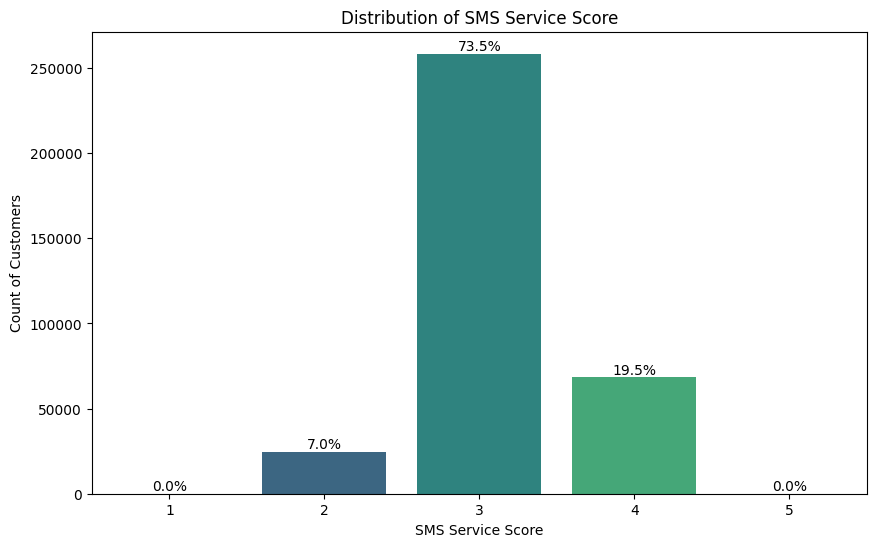

In [30]:
# Plot the distribution of SMS_Service_Score with percentages on top of each bar
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=segmented_data, x='SMS_Service_Score', palette='viridis')
plt.title('Distribution of SMS Service Score')
plt.xlabel('SMS Service Score')
plt.ylabel('Count of Customers')

# Calculate total number of customers to use for percentage calculation
total_count = len(segmented_data)

# Annotate each bar with the percentage of customers
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total_count:.1f}%'  # Calculate percentage
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')  # Position annotation at the top of the bar

plt.show()
plt.close()

/tmp/ipykernel_15721/181852860.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=segmented_data, x='CUST_CATEGORY', y='SMS_Service_Score', palette='coolwarm')


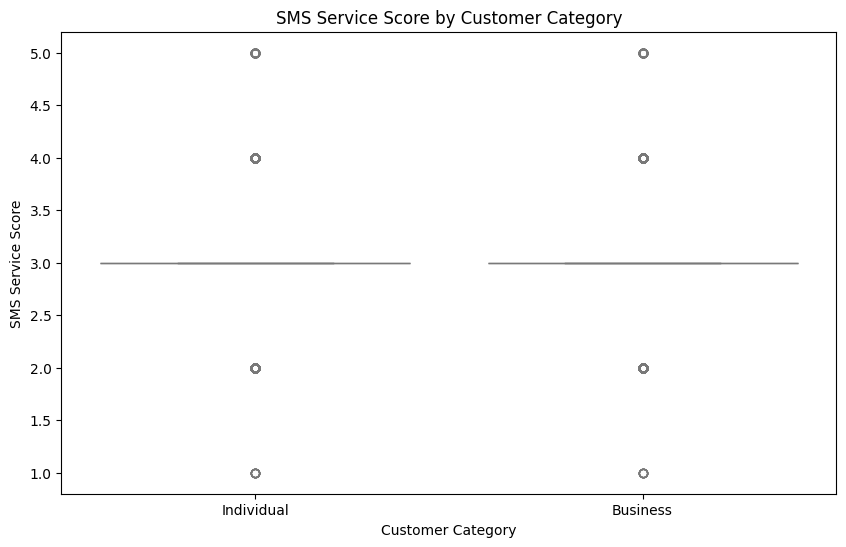

In [31]:
# Generate the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=segmented_data, x='CUST_CATEGORY', y='SMS_Service_Score', palette='coolwarm')
plt.title('SMS Service Score by Customer Category')
plt.xlabel('Customer Category')
plt.ylabel('SMS Service Score')
plt.show()
plt.close()

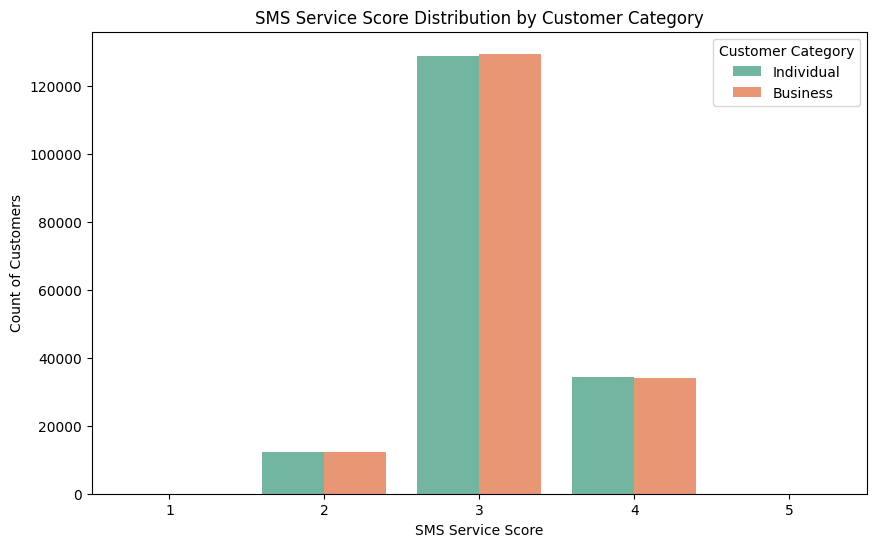

In [32]:
# Generate and save the grouped bar chart
plt.figure(figsize=(10, 6))
sns.countplot(data=segmented_data, x='SMS_Service_Score', hue='CUST_CATEGORY', palette='Set2')
plt.title('SMS Service Score Distribution by Customer Category')
plt.xlabel('SMS Service Score')
plt.ylabel('Count of Customers')
plt.legend(title='Customer Category')
plt.show()
plt.close()

In [34]:
segmented_data[['DIGITAL_REVENUE']]

,DIGITAL_REVENUE
0,128.18
1,38.35
2,66.92
3,112.82
4,94.43
...,...
351743,88.93
351744,11.14
351745,98.29
351746,153.35


In [35]:
segmented_data.Digital_Service_Score.value_counts(normalize=True)*100

Digital_Service_Score
5    20.006084
2    20.003241
3    19.999545
4    19.997271
1    19.993859
Name: proportion, dtype: float64

In [36]:
# Calculate the average DIGITAL_REVENUE for each unique Digital_Service_Score
average_digital_scores = segmented_data.groupby('Digital_Service_Score')['DIGITAL_REVENUE'].mean().reset_index()

# Display the resulting dataframe
average_digital_scores

,Digital_Service_Score,DIGITAL_REVENUE
0,1,20.074315
1,2,60.059051
2,3,99.978567
3,4,140.035484
4,5,180.035350


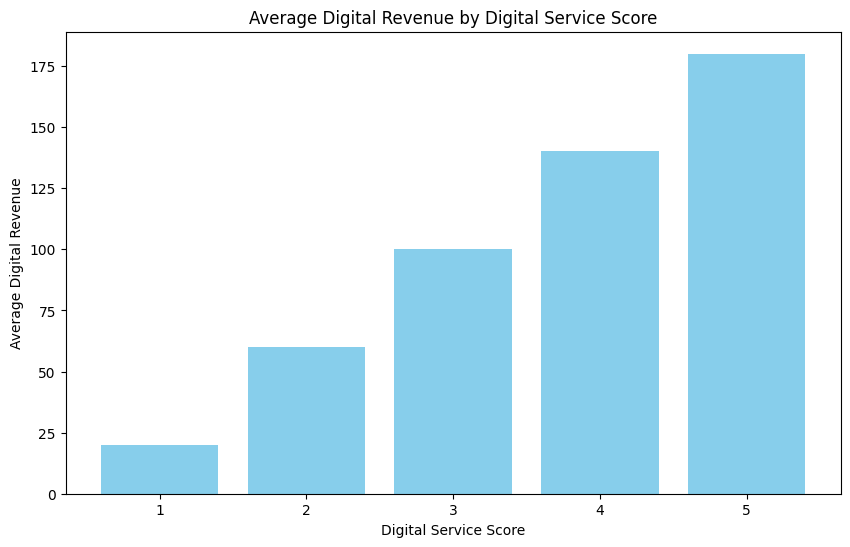

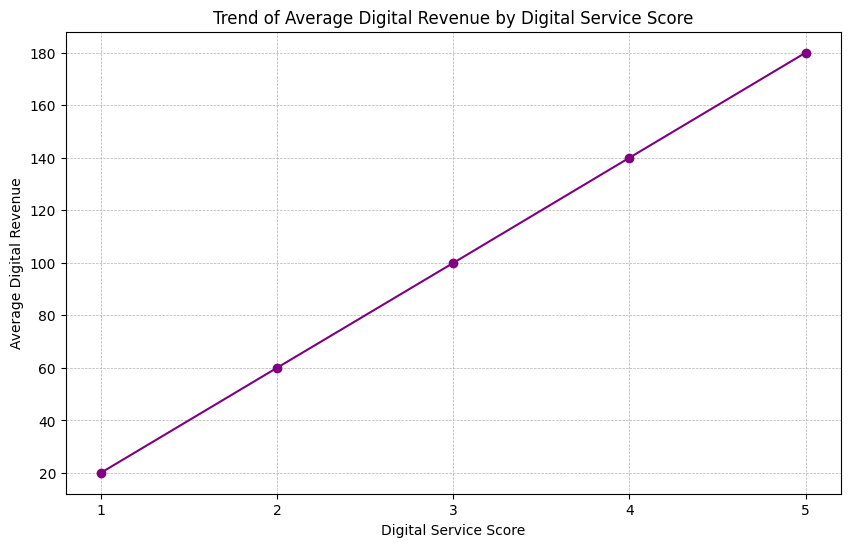

In [37]:
# 1. Bar Plot for Average Digital Revenue by Digital Service Score
plt.figure(figsize=(10, 6))
plt.bar(average_digital_scores['Digital_Service_Score'], average_digital_scores['DIGITAL_REVENUE'], color='skyblue')
plt.title('Average Digital Revenue by Digital Service Score')
plt.xlabel('Digital Service Score')
plt.ylabel('Average Digital Revenue')
plt.xticks(average_digital_scores['Digital_Service_Score'])  # Ensure correct x-axis labels
plt.show()

# 2. Line Plot to Show Trend of Digital Revenue across Scores
plt.figure(figsize=(10, 6))
plt.plot(average_digital_scores['Digital_Service_Score'], average_digital_scores['DIGITAL_REVENUE'], marker='o', color='purple', linestyle='-')
plt.title('Trend of Average Digital Revenue by Digital Service Score')
plt.xlabel('Digital Service Score')
plt.ylabel('Average Digital Revenue')
plt.xticks(average_digital_scores['Digital_Service_Score'])
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.show()

/tmp/ipykernel_15721/3744426647.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=segmented_data, x='Digital_Service_Score', palette='viridis')


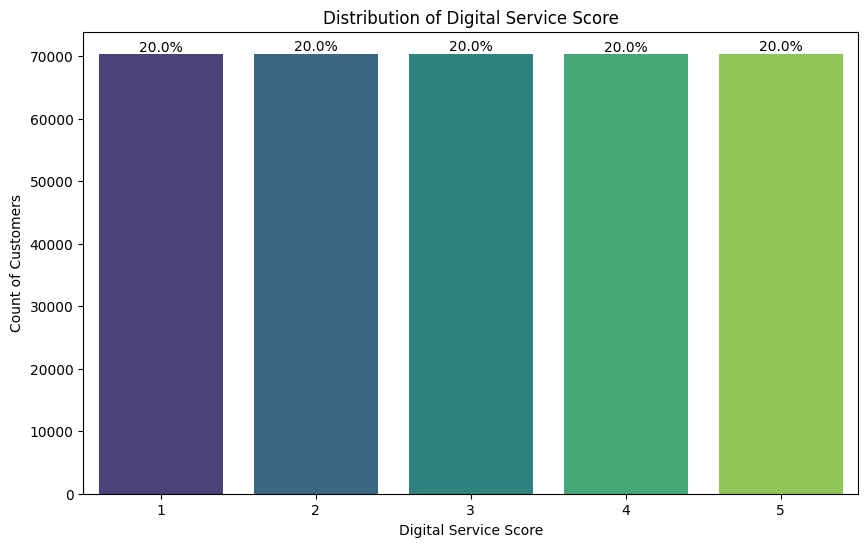

In [38]:
# Plot the distribution of Digital_Service_Score with percentages on top of each bar
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=segmented_data, x='Digital_Service_Score', palette='viridis')
plt.title('Distribution of Digital Service Score')
plt.xlabel('Digital Service Score')
plt.ylabel('Count of Customers')

# Calculate total number of customers for percentage calculation
total_count = len(segmented_data)

# Annotate each bar with the percentage of customers
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total_count:.1f}%'  # Calculate percentage
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')  # Position annotation at the top of the bar

plt.show()
plt.close()

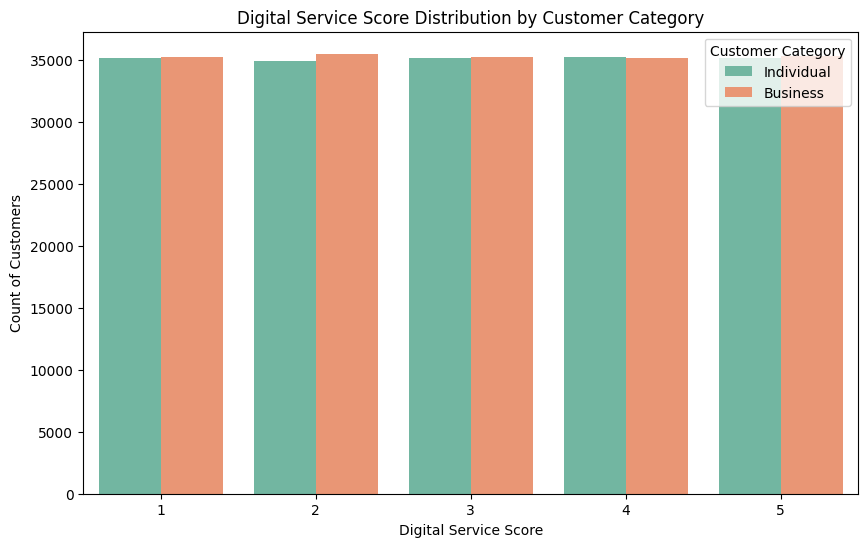

In [39]:
# Generate the grouped bar chart
plt.figure(figsize=(10, 6))
sns.countplot(data=segmented_data, x='Digital_Service_Score', hue='CUST_CATEGORY', palette='Set2')
plt.title('Digital Service Score Distribution by Customer Category')
plt.xlabel('Digital Service Score')
plt.ylabel('Count of Customers')
plt.legend(title='Customer Category')
plt.show()
plt.close()

In [40]:
segmented_data[["SIM_NUMBER", "Mobile_Money_Score", "Data_Service_Score",	"Voice_Service_Score",	"SMS_Service_Score",	"Digital_Service_Score", "Profile_Code"]].head()

,SIM_NUMBER,Mobile_Money_Score,Data_Service_Score,Voice_Service_Score,SMS_Service_Score,Digital_Service_Score,Profile_Code
0,C1850294050,2,2,3,4,4,22344
1,C2042071881,3,4,3,4,1,34341
2,C1001545517,4,3,3,3,2,43332
3,C1204243390,3,2,3,3,3,32333
4,C913434705,3,3,3,3,3,33333


In [41]:
segmented_data.Profile_Code.value_counts(normalize=True)

Profile_Code
33332    0.058260
33333    0.058090
33334    0.057934
33335    0.057615
33331    0.057300
           ...   
21322    0.000003
54331    0.000003
31233    0.000003
53322    0.000003
43314    0.000003
Name: proportion, Length: 660, dtype: float64

In [42]:
len(segmented_data.Profile_Code.unique())

660

In [43]:
# Defining all required columns into a single list for aggregation
columns_to_aggregate = [
    'MOB_MONEY_REVENUE', 'TOTAL_SPENT_MOB_MONEY_ACCOUNT', 'TOTAL_LOADING_MONEY_IN_MOB_MONEY',
    'TOTAL_CASHOUT_MOB_MONEY_ACCOUNT', 'TOTAL_CASHOUT_MOB_MONEY_FOR_package_PURCHASE',
    'TOTAL_CASHOUT_MOB_MONEY_TRANSFER_MONEY', 'REFILL_mobile_money_ACCOUNT',

    'NB_VOICE_PACKAGES_SUBS_VIA_MOB_MONEY', 'NB_DATA_package_SUBS_VIA_MOB_MONEY',
    'NB_SMS_package_SUBS_VIA_MOB_MONEY', 'NB_MIXED_package_SUBS_VIA_MOB_MONEY',

    'PAID_DATA_VOLUME', 'DATA_REVENUE', 'FREE_DATA_VOLUME',

    'NB_DATA_PACKAGES_SUBSCRIPTIONS', 'NB_DATA_package_SUBS_VIA_POS',
    'NB_DATA_package_SUBS_VIA_MAIN_ACCOUNT', 'IS_DATA_RGS90',

    'PAID_VOICE_TRAFFIC', 'VOICE_REVENUE', 'FREE_VOICE_TRAFFIC', 'VOICE_TRAFFIC_ONNET',
    'VOICE_TRAFFIC_OFFNET', 'VOICE_OUTGOING_TRAFFIC_INTERNATIONAL', 'VOICE_INCOMING_TRAFFIC_INTERNATIONAL',
    'VOICE_OUTGOING_TRAFFIC_ONNET', 'VOICE_INCOMING_TRAFFIC_ONNET',
    'VOICE_OUTGOING_TRAFFIC_OFFNET', 'VOICE_INCOMING_TRAFFIC_OFFNET',
    'NB_CALLS_EMITTED_ONNET', 'NB_CALLS_RECEIVED_ONNET', 'NB_CALLS_EMITTED_OFFNET',
    'NB_CALLS_RECEIVED_OFFNET', 'VOICE_PACKAGES_REVENUE',

    'NB_VOICE_PACKAGES_SUBSCRIPTIONS', 'NB_VOICE_PACKAGES_SUBS_VIA_POS',
    'NB_VOICE_PACKAGES_SUBS_VIA_MAIN_ACCOUNT',

    'SMS_REVENUE', 'NB_SMS_SENT_ONNET', 'NB_SMS_SENT_OFFNET', 'NB_SMS_RECEIVED_ONNET',
    'NB_SMS_RECEIVED_OFFNET', 'NB_SMS_SENT_INTERNATIONAL', 'NB_SMS_RECEIVED_INTERNATIONAL',
    'SMS_PACKAGE_REVENUE',

    'NB_SMS_PACKAGES_SUBSCRIPTIONS', 'NB_SMS_package_SUBS_VIA_POS',
    'NB_SMS_package_SUBS_VIA_MAIN_ACCOUNT',

    'DIGITAL_REVENUE'
]

# Aggregating data by Profile_Code and calculating the mean for each column
aggregated_profile_data = segmented_data.groupby('Profile_Code')[columns_to_aggregate].mean().reset_index()

# Display the resulting dataframe
aggregated_profile_data

,Profile_Code,MOB_MONEY_REVENUE,TOTAL_SPENT_MOB_MONEY_ACCOUNT,TOTAL_LOADING_MONEY_IN_MOB_MONEY,TOTAL_CASHOUT_MOB_MONEY_ACCOUNT,TOTAL_CASHOUT_MOB_MONEY_FOR_package_PURCHASE,TOTAL_CASHOUT_MOB_MONEY_TRANSFER_MONEY,REFILL_mobile_money_ACCOUNT,NB_VOICE_PACKAGES_SUBS_VIA_MOB_MONEY,NB_DATA_package_SUBS_VIA_MOB_MONEY,...,NB_SMS_SENT_OFFNET,NB_SMS_RECEIVED_ONNET,NB_SMS_RECEIVED_OFFNET,NB_SMS_SENT_INTERNATIONAL,NB_SMS_RECEIVED_INTERNATIONAL,SMS_PACKAGE_REVENUE,NB_SMS_PACKAGES_SUBSCRIPTIONS,NB_SMS_package_SUBS_VIA_POS,NB_SMS_package_SUBS_VIA_MAIN_ACCOUNT,DIGITAL_REVENUE
0,12331,143.38,961.32,456.59,1892.77,105.42,133.75,136.68,0.0,0.0,...,21.0,1.0,4.0,0.0,4.0,23.94,5.0,1.0,4.0,22.67
1,14333,172.58,8.22,65.65,1448.80,311.52,54.71,66.51,0.0,0.0,...,24.0,7.0,7.0,3.0,5.0,21.09,3.0,1.0,1.0,82.10
2,14343,308.33,880.81,85.96,607.71,37.39,203.37,161.04,1.0,0.0,...,31.0,37.0,18.0,8.0,4.0,95.41,4.0,4.0,2.0,115.49
3,21322,159.93,944.49,4971.01,2261.05,376.14,245.48,840.66,1.0,1.0,...,34.0,5.0,24.0,5.0,1.0,34.98,6.0,0.0,0.0,59.98
4,21323,217.24,46.67,4031.67,308.45,5.12,784.51,656.98,0.0,0.0,...,4.0,3.0,9.0,0.0,6.0,39.22,6.0,4.0,0.0,84.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,54342,896.03,3542.50,4373.97,3745.16,1820.29,2948.12,805.47,3.0,4.0,...,16.0,46.0,43.0,4.0,2.0,25.89,8.0,3.0,0.0,70.37
656,54344,840.27,2756.37,3845.12,4395.85,1834.83,2243.56,831.15,4.0,3.0,...,45.0,7.0,32.0,0.0,8.0,45.16,9.0,3.0,4.0,138.30
657,54433,521.10,4391.99,4663.83,4132.69,1713.57,1894.10,892.33,3.0,4.0,...,37.0,4.0,25.0,2.0,0.0,79.39,9.0,0.0,1.0,103.56
658,54435,824.08,4536.09,4509.42,2787.93,1712.64,2602.06,227.12,4.0,4.0,...,8.0,39.0,41.0,4.0,9.0,51.56,6.0,0.0,3.0,191.23


/tmp/ipykernel_15721/3788405905.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_20_profile_codes.index, y=top_20_profile_codes.values, palette="viridis")


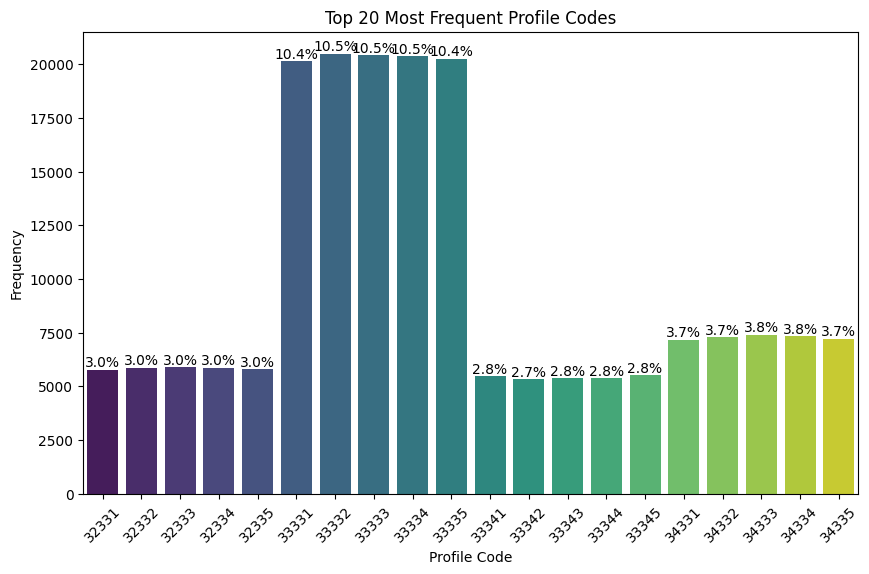

In [44]:
# Count the occurrences of each Profile_Code and get the 20 most common ones
top_20_profile_codes = segmented_data['Profile_Code'].value_counts().head(20)

# Plot the top 10 most frequent Profile Codes with percentages on top of each bar
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_20_profile_codes.index, y=top_20_profile_codes.values, palette="viridis")
plt.title("Top 20 Most Frequent Profile Codes")
plt.xlabel("Profile Code")
plt.ylabel("Frequency")
plt.xticks(rotation=45)

# Calculate total customers in top 20 for percentage calculation
total_count_top_20 = top_20_profile_codes.sum()

# Annotate each bar with the percentage of customers
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total_count_top_20:.1f}%'  # Calculate percentage
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')  # Position annotation at the top of the bar

#plt.savefig("top_20_profile_codes_with_percentage.png")  # Save the updated plot as PNG
plt.show()

In [45]:
# Filter the data to include only the top 20 most frequent Profile Codes
top_20_profile_data = segmented_data[segmented_data['Profile_Code'].isin(top_20_profile_codes.index)]

# Aggregate the filtered data by Profile Code using the specified columns and calculating the mean for each
aggregated_top_20_profile_data = top_20_profile_data.groupby('Profile_Code')[columns_to_aggregate].mean().reset_index()

# Display the resulting aggregated dataframe
aggregated_top_20_profile_data

,Profile_Code,MOB_MONEY_REVENUE,TOTAL_SPENT_MOB_MONEY_ACCOUNT,TOTAL_LOADING_MONEY_IN_MOB_MONEY,TOTAL_CASHOUT_MOB_MONEY_ACCOUNT,TOTAL_CASHOUT_MOB_MONEY_FOR_package_PURCHASE,TOTAL_CASHOUT_MOB_MONEY_TRANSFER_MONEY,REFILL_mobile_money_ACCOUNT,NB_VOICE_PACKAGES_SUBS_VIA_MOB_MONEY,NB_DATA_package_SUBS_VIA_MOB_MONEY,...,NB_SMS_SENT_OFFNET,NB_SMS_RECEIVED_ONNET,NB_SMS_RECEIVED_OFFNET,NB_SMS_SENT_INTERNATIONAL,NB_SMS_RECEIVED_INTERNATIONAL,SMS_PACKAGE_REVENUE,NB_SMS_PACKAGES_SUBSCRIPTIONS,NB_SMS_package_SUBS_VIA_POS,NB_SMS_package_SUBS_VIA_MAIN_ACCOUNT,DIGITAL_REVENUE
0,32331,486.266561,2400.194849,2388.209946,2403.163662,971.086138,1423.908567,476.421818,1.903577,1.967513,...,23.884914,23.874374,23.376188,4.307413,4.307413,48.476264,4.322965,1.914291,1.899775,20.089416
1,32332,481.864391,2378.966162,2409.367449,2410.278553,957.033857,1452.765248,477.029816,1.929252,1.922789,...,23.777041,23.784354,23.711565,4.316497,4.378061,48.170784,4.356293,1.942687,1.943707,59.928296
2,32333,479.115025,2370.343199,2415.003016,2398.365086,956.151255,1432.375043,474.703367,1.916709,1.913995,...,23.560984,24.054283,23.456997,4.337913,4.294826,47.662980,4.387277,1.970823,1.954538,100.117866
3,32334,483.813898,2410.180464,2400.957073,2366.647446,958.616151,1448.394129,478.564774,1.927891,1.925850,...,23.240646,23.895068,23.531463,4.337585,4.376871,48.157224,4.384694,1.926871,1.934694,140.047037
4,32335,481.696818,2410.714049,2403.799174,2419.736211,965.680605,1430.089576,483.193872,1.904327,1.951905,...,23.792277,23.734184,23.616618,4.370626,4.310464,47.899631,4.429753,1.916738,1.941562,180.289550
5,33331,482.510156,2399.509578,2418.529475,2385.795464,954.772184,1438.543450,480.015383,1.913322,1.925180,...,23.526123,23.542396,23.681866,4.307864,4.306574,48.312943,4.353411,1.953411,1.959514,20.180483
6,33332,476.713467,2419.830268,2407.641940,2404.380857,962.063524,1443.521684,482.112636,1.912751,1.954619,...,23.732738,23.766701,23.577856,4.337140,4.346948,48.017179,4.316059,1.928219,1.943249,60.021425
7,33333,483.420742,2407.731647,2402.694117,2390.582916,961.274535,1439.876696,481.560047,1.933147,1.935252,...,23.665296,23.655802,23.694758,4.326677,4.316155,48.209279,4.331523,1.936769,1.931190,99.932024
8,33334,481.152873,2386.488619,2407.229596,2402.868038,959.872305,1439.340462,480.871378,1.914172,1.943861,...,23.784130,23.581117,23.589754,4.336539,4.317794,48.249397,4.330847,1.948081,1.942781,139.979758
9,33335,479.496918,2390.842504,2397.947770,2403.407151,959.498107,1438.237982,481.143176,1.923271,1.930968,...,23.630169,23.526744,23.446955,4.319649,4.367956,48.408900,4.327297,1.947794,1.946462,180.093993


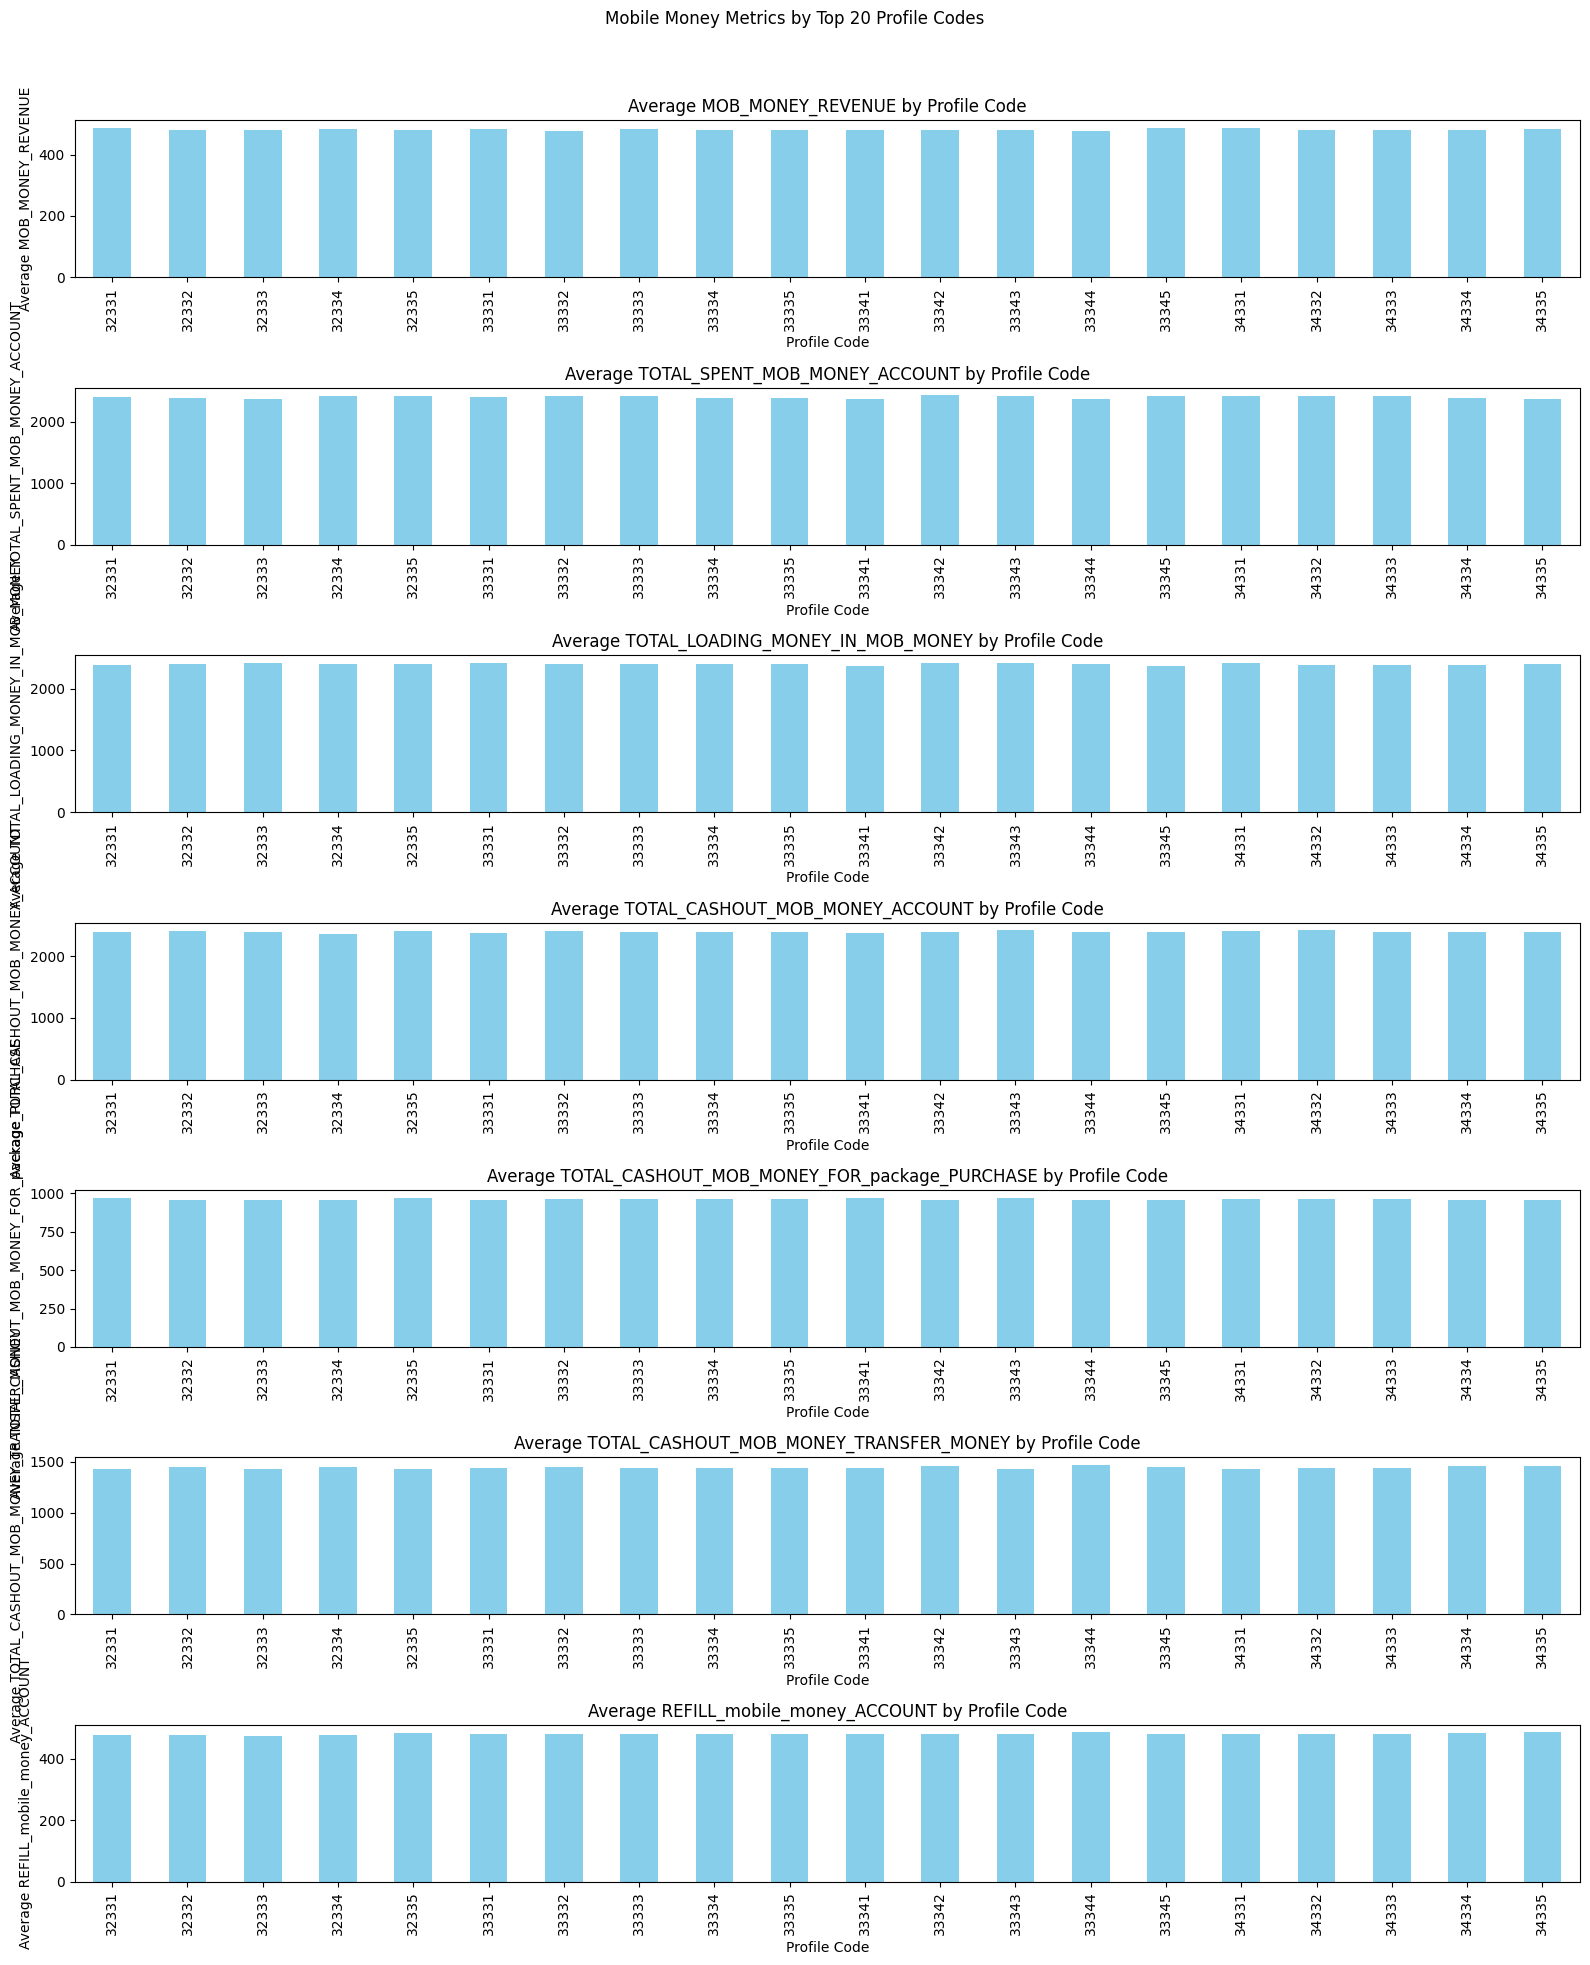

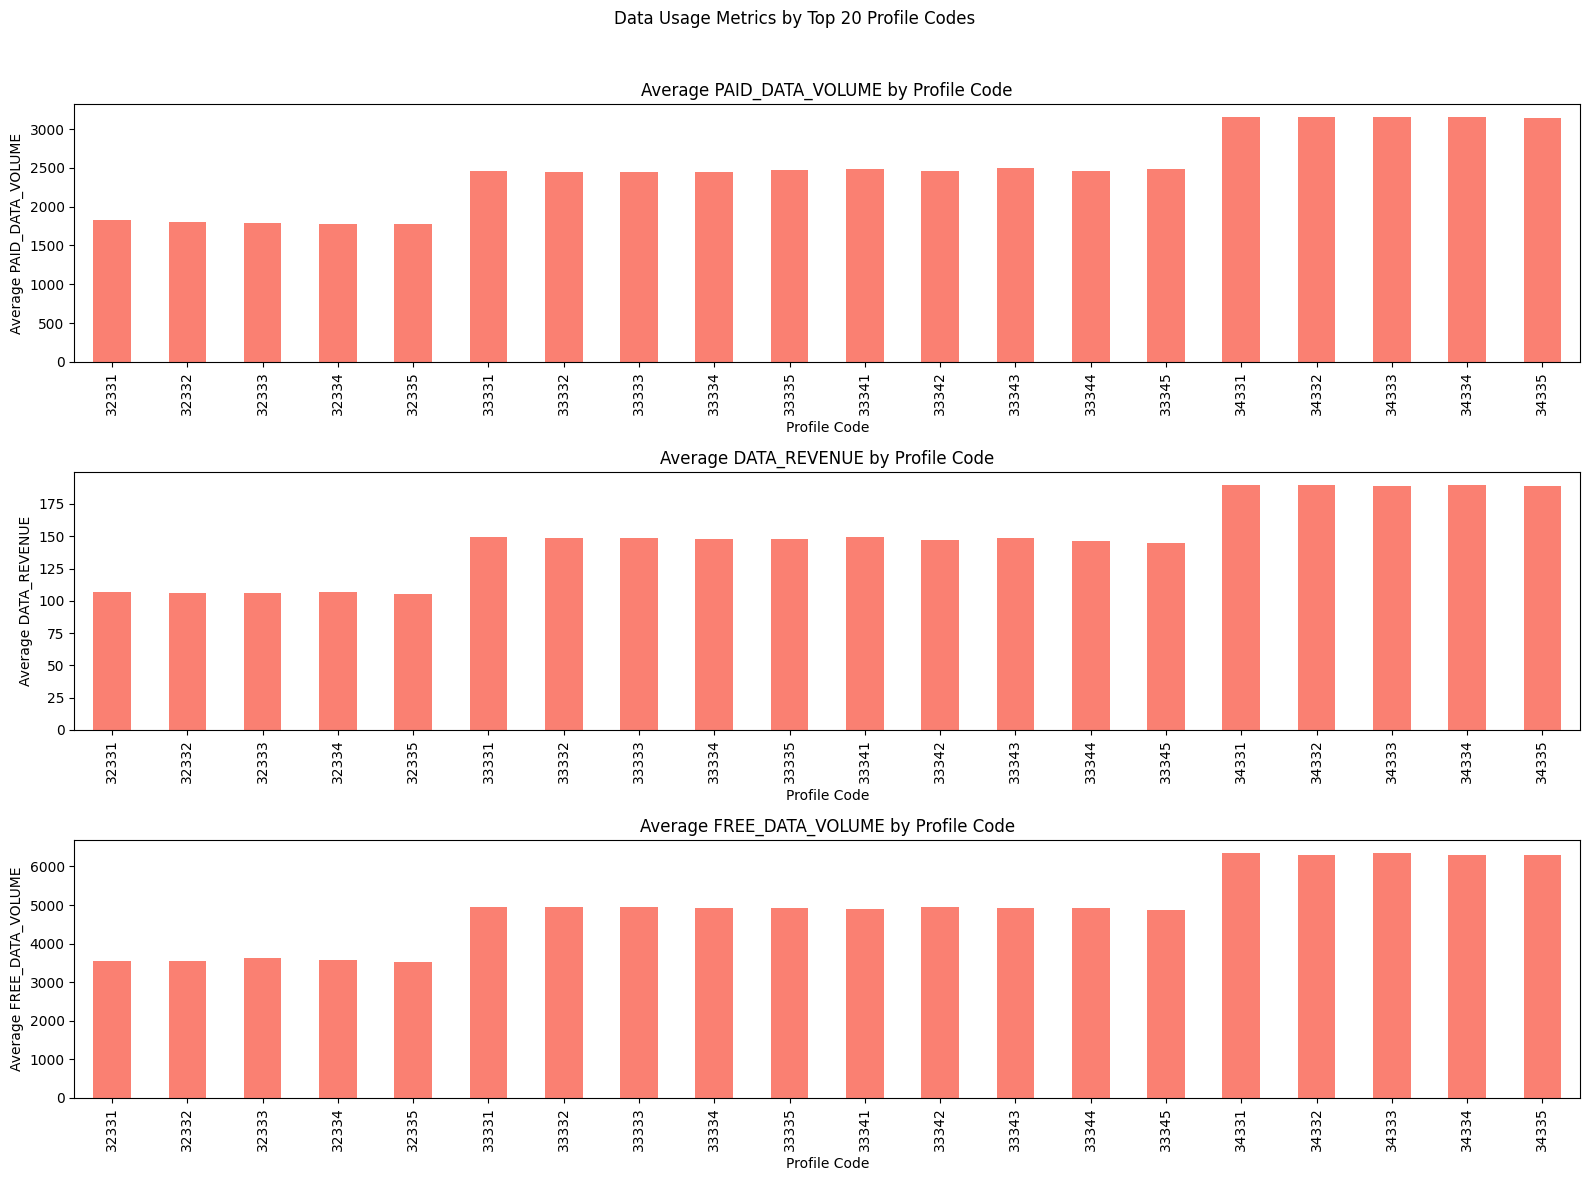

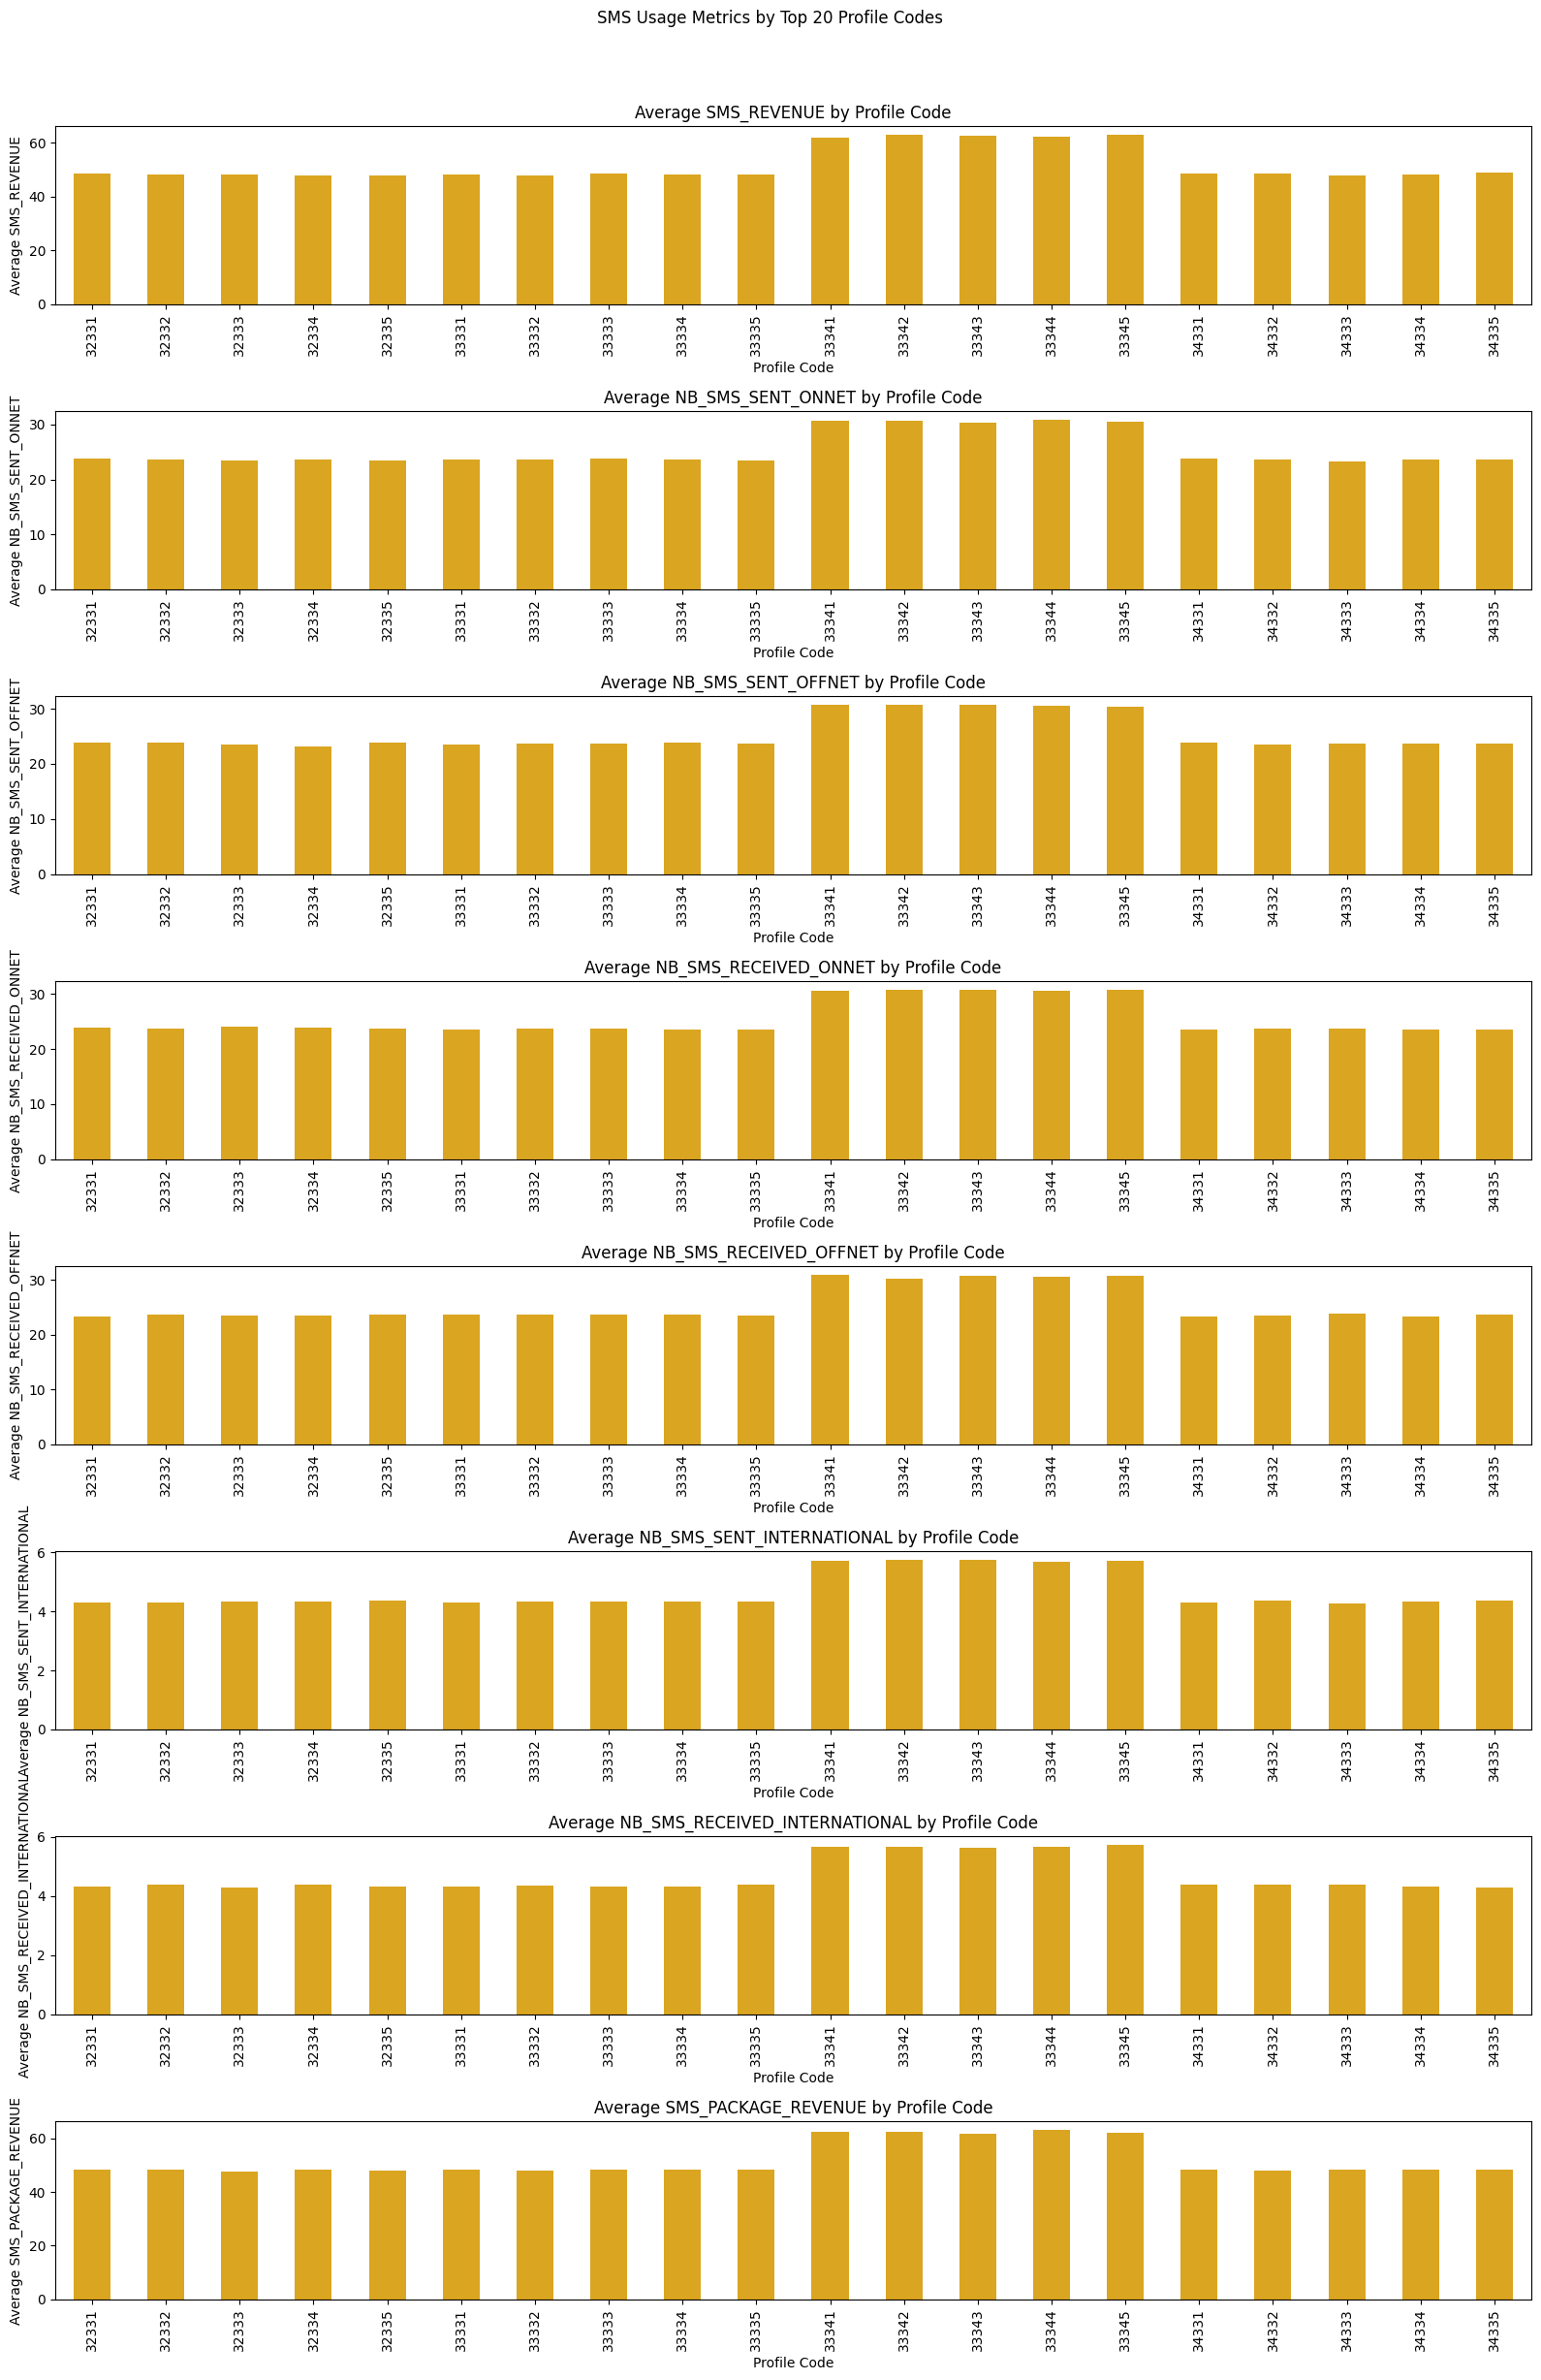

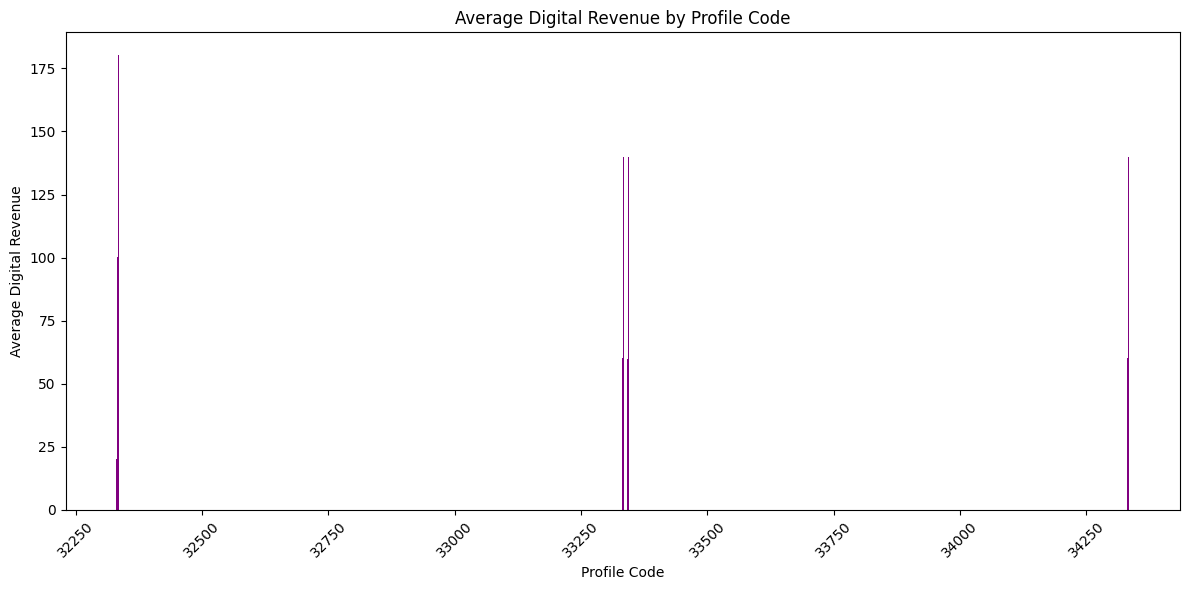

In [46]:
# Plot setup to visualize and compare the main metrics across the top 20 most frequent Profile Codes

# Define subsets of columns for easier visualization in separate plots
mob_money_columns = [
    'MOB_MONEY_REVENUE', 'TOTAL_SPENT_MOB_MONEY_ACCOUNT', 'TOTAL_LOADING_MONEY_IN_MOB_MONEY',
    'TOTAL_CASHOUT_MOB_MONEY_ACCOUNT', 'TOTAL_CASHOUT_MOB_MONEY_FOR_package_PURCHASE',
    'TOTAL_CASHOUT_MOB_MONEY_TRANSFER_MONEY', 'REFILL_mobile_money_ACCOUNT'
]

data_columns = ['PAID_DATA_VOLUME', 'DATA_REVENUE', 'FREE_DATA_VOLUME']
sms_columns = [
    'SMS_REVENUE', 'NB_SMS_SENT_ONNET', 'NB_SMS_SENT_OFFNET', 'NB_SMS_RECEIVED_ONNET',
    'NB_SMS_RECEIVED_OFFNET', 'NB_SMS_SENT_INTERNATIONAL', 'NB_SMS_RECEIVED_INTERNATIONAL',
    'SMS_PACKAGE_REVENUE'
]

# Visualization 1: Mobile Money Metrics for Top 20 Profile Codes
fig, ax = plt.subplots(len(mob_money_columns), 1, figsize=(16, 20))
fig.suptitle("Mobile Money Metrics by Top 20 Profile Codes")

for i, col in enumerate(mob_money_columns):
    aggregated_top_20_profile_data.plot(kind='bar', x='Profile_Code', y=col, ax=ax[i], legend=False, color='skyblue')
    ax[i].set_title(f"Average {col} by Profile Code")
    ax[i].set_xlabel("Profile Code")
    ax[i].set_ylabel(f"Average {col}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Visualization 2: Data Usage Metrics for Top 20 Profile Codes
fig, ax = plt.subplots(len(data_columns), 1, figsize=(16, 12))
fig.suptitle("Data Usage Metrics by Top 20 Profile Codes")

for i, col in enumerate(data_columns):
    aggregated_top_20_profile_data.plot(kind='bar', x='Profile_Code', y=col, ax=ax[i], legend=False, color='salmon')
    ax[i].set_title(f"Average {col} by Profile Code")
    ax[i].set_xlabel("Profile Code")
    ax[i].set_ylabel(f"Average {col}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Visualization 3: SMS Usage Metrics for Top 20 Profile Codes
fig, ax = plt.subplots(len(sms_columns), 1, figsize=(16, 25))
fig.suptitle("SMS Usage Metrics by Top 20 Profile Codes")

for i, col in enumerate(sms_columns):
    aggregated_top_20_profile_data.plot(kind='bar', x='Profile_Code', y=col, ax=ax[i], legend=False, color='goldenrod')
    ax[i].set_title(f"Average {col} by Profile Code")
    ax[i].set_xlabel("Profile Code")
    ax[i].set_ylabel(f"Average {col}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Visualization 4: Digital Revenue for Top 20 Profile Codes
plt.figure(figsize=(12, 6))
plt.bar(aggregated_top_20_profile_data['Profile_Code'], aggregated_top_20_profile_data['DIGITAL_REVENUE'], color='purple')
plt.title("Average Digital Revenue by Profile Code")
plt.xlabel("Profile Code")
plt.ylabel("Average Digital Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [47]:
# Display the first few rows to verify the 'Segment' column
segmented_data[['SIM_NUMBER', 'Profile_Code', 'Weighted_Score', 'Segment']].head()

,SIM_NUMBER,Profile_Code,Weighted_Score,Segment
0,C1850294050,22344,39,Very Low
1,C2042071881,34341,49,High
2,C1001545517,43332,49,High
3,C1204243390,32333,41,Very Low
4,C913434705,33333,45,Medium


In [48]:
segmented_data.Segment.value_counts(normalize=True)

Segment
High         0.257264
Very High    0.213829
Medium       0.195643
Low          0.177269
Very Low     0.155995
Name: proportion, dtype: float64

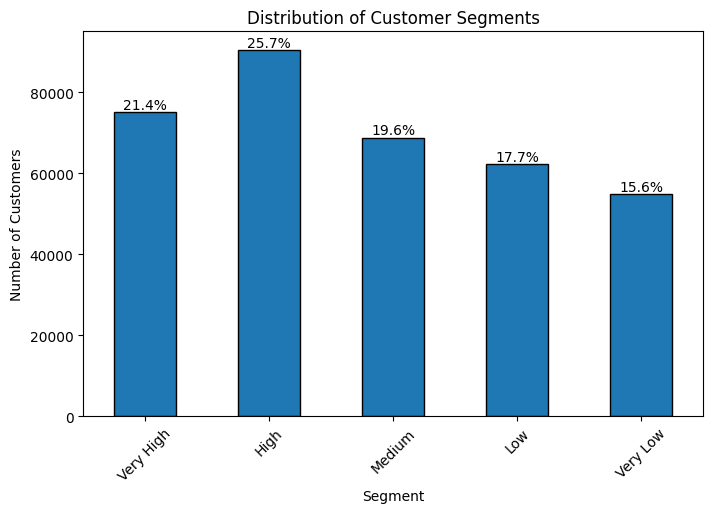

In [49]:
# Desired order for the segments
segment_order = ['Very High', 'High', 'Medium', 'Low', 'Very Low']

# Plot if 'Segment' exists in the data
if 'Segment' in segmented_data.columns:
    plt.figure(figsize=(8, 5))
    ax = segmented_data['Segment'].value_counts().reindex(segment_order).plot(kind='bar', edgecolor='black')
    plt.title("Distribution of Customer Segments")
    plt.xlabel("Segment")
    plt.ylabel("Number of Customers")
    plt.xticks(rotation=45)

    # Calculate total number of customers for percentage calculation
    total_count = len(segmented_data)

    # Annotate each bar with the percentage of customers
    for p in ax.patches:
        height = p.get_height()
        percentage = f'{100 * height / total_count:.1f}%'  # Calculate percentage
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom')  # Position annotation at the top of the bar

    plt.show()
else:
    print("The 'Segment' column is not available in the dataset.")